# Comparison of ML Algorithms for the Power Consumption Prediction: Case Study

In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('Tetuan City power consumption.csv')
data.shape

(52416, 9)

The data is loaded from resources. Dataframe has 9 columns and 52416 instances. The columns are 'DateTime', 'Temperature', 'Humidity', 'Wind Speed', 'general diffuse flows', 'diffuse flows', 'Zone 1 Power Consumption', 'Zone 2  Power Consumption', 'Zone 3  Power Consumption'.

There is no missing value in any column.

Datetime components are created as variable features: Day of week, day of year, hour, minute, month, quarter, week of year, and whether an instance is a weekday.

In [3]:
# Convert 'DateTime' column to datetime format
data['DateTime'] = pd.to_datetime(data['DateTime'])

# Extract datetime components
data['DayOfWeek'] = data['DateTime'].dt.dayofweek
data['DayOfYear'] = data['DateTime'].dt.dayofyear
data['Hour'] = data['DateTime'].dt.hour
data['Minute'] = data['DateTime'].dt.minute
data['Month'] = data['DateTime'].dt.month
data['Quarter'] = data['DateTime'].dt.quarter
data['WeekOfYear'] = data['DateTime'].dt.isocalendar().week
data['IsWeekday'] = data['DateTime'].dt.dayofweek.apply(lambda x: 1 if x < 5 else 0)

data.columns

Index(['DateTime', 'Temperature', 'Humidity', 'Wind Speed',
       'general diffuse flows', 'diffuse flows', 'Zone 1 Power Consumption',
       'Zone 2  Power Consumption', 'Zone 3  Power Consumption', 'DayOfWeek',
       'DayOfYear', 'Hour', 'Minute', 'Month', 'Quarter', 'WeekOfYear',
       'IsWeekday'],
      dtype='object')

Create an additional column 'Average Power Consumption' which contains the average value of the power consumption from Zone 1, zone 2 and zone 3 for each row.

In [ ]:
data['Average Power Consumption'] = data[['Zone 1 Power Consumption', 'Zone 2  Power Consumption', 'Zone 3  Power Consumption']].mean(axis=1)
data.columns

**Set X and y for training and test sets from the original dataset**

- 75% of the data is training data
- 25% of the data is for testing

In [ ]:
from sklearn.model_selection import train_test_split
features = ['Temperature', 'Humidity', 'Wind Speed', 'general diffuse flows', 'diffuse flows','DayOfWeek','DayOfYear','Hour','Minute','Month','Quarter', 'WeekOfYear', 'IsWeekday', 'Average Power Consumption']
X_original = data[features]

y1_original = data['Zone 1 Power Consumption']
y2_original = data['Zone 2  Power Consumption']
y3_original = data['Zone 3  Power Consumption']
y4_original = data['Average Power Consumption']
X_train_original, X_test_original, y_train_1_original, y_test_1_original = train_test_split(X_original, y1_original, test_size=0.25, random_state=42)
X_train_original, X_test_original, y_train_2_original, y_test_2_original = train_test_split(X_original, y2_original, test_size=0.25, random_state=42)
X_train_original, X_test_original, y_train_3_original, y_test_3_original = train_test_split(X_original, y3_original, test_size=0.25, random_state=42)
X_train_original, X_test_original, y_train_4_original, y_test_4_original = train_test_split(X_original, y4_original, test_size=0.25, random_state=42)

**Normalise data using Min-Max**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
data_normalised = data.copy()

columns_to_drop = ['DateTime', 'DayOfWeek',
       'DayOfYear', 'Hour', 'Minute', 'Month', 'Quarter', 'WeekOfYear',
       'IsWeekday']
columns_to_normalise = ['Temperature', 'Humidity', 'Wind Speed',
       'general diffuse flows', 'diffuse flows', 'Zone 1 Power Consumption',
       'Zone 2  Power Consumption', 'Zone 3  Power Consumption', 'Average Power Consumption']
scaler = MinMaxScaler()

data_normalised[columns_to_normalise] = scaler.fit_transform(data_normalised[columns_to_normalise])

print(data_normalised)

## Predictions of 10-minute periods

**Set X and y for training and test sets from the normalised dataset**

- 75% of the data is training data
- 25% of the data is for testing

In [ ]:
data_normalised.columns.tolist()

In [ ]:
from sklearn.model_selection import train_test_split

X = data_normalised[features]

y1 = data_normalised['Zone 1 Power Consumption']
y2 = data_normalised['Zone 2  Power Consumption']
y3 = data_normalised['Zone 3  Power Consumption']
y4 = data_normalised['Average Power Consumption']
X_train, X_test, y_train_1, y_test_1 = train_test_split(X, y1, test_size=0.25, random_state=42)
X_train, X_test, y_train_2, y_test_2 = train_test_split(X, y2, test_size=0.25, random_state=42)
X_train, X_test, y_train_3, y_test_3 = train_test_split(X, y3, test_size=0.25, random_state=42)
X_train, X_test, y_train_4, y_test_4 = train_test_split(X, y4, test_size=0.25, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

### Random Forest (10 minute periods)

Based on Case Study of Tetuoan city, the best parameters for Random Forest model are:
- Number of trees in the forest: n_estimators=30
- Number of features at each split: max_features=7
- Max depth of each tree: max_depth=None
- Min number of samples to split: min_samples_split=2
- Min number of samples at a leaf node: min_samples_leaf=1

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

rf_regressor = RandomForestRegressor(
    n_estimators=30,
    max_features=7,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

**Analyse Random Forest model on the training set**

In [ ]:
#Using original data
# Random Forest model for Zone 1
rf_regressor.fit(X_train_original, y_train_1_original)
y_train_pred_rf_1 = rf_regressor.predict(X_train_original)

mse_train_rf_1 = mean_squared_error(y_train_1_original, y_train_pred_rf_1)
rmse_train_rf_1 = np.sqrt(mse_train_rf_1)
mae_train_rf_1 = mean_absolute_error(y_train_1_original, y_train_pred_rf_1)


# Random Forest model for Zone 2
rf_regressor.fit(X_train_original, y_train_2_original)
y_train_pred_rf_2 = rf_regressor.predict(X_train_original)

mse_train_rf_2 = mean_squared_error(y_train_2_original, y_train_pred_rf_2)
rmse_train_rf_2 = np.sqrt(mse_train_rf_2)
mae_train_rf_2 = mean_absolute_error(y_train_2_original, y_train_pred_rf_2)

# Random Forest model for Zone 3
rf_regressor.fit(X_train_original, y_train_3_original)
y_train_pred_rf_3 = rf_regressor.predict(X_train_original)

mse_train_rf_3 = mean_squared_error(y_train_3_original, y_train_pred_rf_3)
rmse_train_rf_3 = np.sqrt(mse_train_rf_3)
mae_train_rf_3 = mean_absolute_error(y_train_3_original, y_train_pred_rf_3)

# Random Forest model for Average Power Consumption
rf_regressor.fit(X_train_original, y_train_4_original)
y_train_pred_rf_4 = rf_regressor.predict(X_train_original)

mse_train_rf_4 = mean_squared_error(y_train_4_original, y_train_pred_rf_4)
rmse_train_rf_4 = np.sqrt(mse_train_rf_4)
mae_train_rf_4 = mean_absolute_error(y_train_4_original, y_train_pred_rf_4)

print(f"Root Mean Squared Error of Zone 1, 2 3 respectively:\n")
print({rmse_train_rf_1},{rmse_train_rf_2},{rmse_train_rf_3},{rmse_train_rf_4})
print(f"\nMean Absolute Error of Zone 1,2,3 respectively:\n")
print({mae_train_rf_1},{mae_train_rf_2},{mae_train_rf_3},{mae_train_rf_4})

Result:

Root Mean Squared Error of Zone 1, 2 3 respectively:

{205.31520166146737} {169.76565354457225} {143.5315955528895} {23.23011302696544}

Mean Absolute Error of Zone 1,2,3 respectively:

{129.17573637566136} {106.88588603948244} {93.45579105076308} {13.311942475842962}

**Analyse Random Forest model on the test set**

In [ ]:
#Using original data:
# Random Forest model for Zone 1
rf_regressor.fit(X_train_original, y_train_1_original)
y_pred_rf_1 = rf_regressor.predict(X_test_original)

mse_rf_1 = mean_squared_error(y_test_1_original, y_pred_rf_1)
rmse_rf_1 = np.sqrt(mse_rf_1)
mae_rf_1 = mean_absolute_error(y_test_1_original, y_pred_rf_1)


# Random Forest model for Zone 2
rf_regressor.fit(X_train_original, y_train_2_original)
y_pred_rf_2 = rf_regressor.predict(X_test_original)

mse_rf_2 = mean_squared_error(y_test_2_original, y_pred_rf_2)
rmse_rf_2 = np.sqrt(mse_rf_2)
mae_rf_2 = mean_absolute_error(y_test_2_original, y_pred_rf_2)

# Random Forest model for Zone 3
rf_regressor.fit(X_train_original, y_train_3_original)
y_pred_rf_3 = rf_regressor.predict(X_test_original)

mse_rf_3 = mean_squared_error(y_test_3_original, y_pred_rf_3)
rmse_rf_3 = np.sqrt(mse_rf_3)
mae_rf_3 = mean_absolute_error(y_test_3_original, y_pred_rf_3)

# Random Forest model for Average Power Consumption
rf_regressor.fit(X_train_original, y_train_4_original)
y_pred_rf_4 = rf_regressor.predict(X_test_original)

mse_rf_4 = mean_squared_error(y_test_4_original, y_pred_rf_4)
rmse_rf_4 = np.sqrt(mse_rf_4)
mae_rf_4 = mean_absolute_error(y_test_4_original, y_pred_rf_4)

print(f"Root Mean Squared Error of Zone 1, 2 3 respectively:\n")
print({rmse_rf_1},{rmse_rf_2},{rmse_rf_3},{rmse_rf_4})
print(f"\nMean Absolute Error of Zone 1,2,3 respectively:\n")
print({mae_rf_1},{mae_rf_2},{mae_rf_3},{mae_rf_4})

Results:

Root Mean Squared Error of Zone 1, 2 3 respectively:

{508.52370683610275} {410.6753018001097} {352.248595956872} {43.25474339863196}

Mean Absolute Error of Zone 1,2,3 respectively:

{323.11089429248074} {267.68984809223906} {234.28681520551737} {25.90453531938137}

### Decision Tree (10 minute periods)

Based on Case Study of Tetuoan city, the best parameters for Decision Tree model are:
- Depth of tree: max_depth=None
- Min number of samples to split  an internal node: min_samples_split=10
- Min number of samples to be at a leaf node: min_samples_leaf=10
- Number of features: max_features=9

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

dt_regressor = DecisionTreeRegressor(
    max_depth=None,
    min_samples_split=10,
    min_samples_leaf=10,
    max_features=9,
    random_state=42
)

**Analysing Decision Tree model on the training set**

In [ ]:
#Using original data set
#Decision tree model for Zone 1
dt_regressor.fit(X_train_original, y_train_1_original)
y_train_pred_dt_1 = dt_regressor.predict(X_train_original)

mse_train_dt_1 = mean_squared_error(y_train_1_original, y_train_pred_dt_1)
rmse_train_dt_1 = np.sqrt(mse_train_dt_1)
mae_train_dt_1 = mean_absolute_error(y_train_1_original, y_train_pred_dt_1)

#Decision tree model for Zone 2
dt_regressor.fit(X_train_original, y_train_2_original)
y_train_pred_dt_2 = dt_regressor.predict(X_train_original)

mse_train_dt_2 = mean_squared_error(y_train_2_original, y_train_pred_dt_2)
rmse_train_dt_2 = np.sqrt(mse_train_dt_2)
mae_train_dt_2 = mean_absolute_error(y_train_2_original, y_train_pred_dt_2)

#Decision tree model for Zone 3
dt_regressor.fit(X_train_original, y_train_3_original)
y_train_pred_dt_3 = dt_regressor.predict(X_train_original)

mse_train_dt_3 = mean_squared_error(y_train_3_original, y_train_pred_dt_3)
rmse_train_dt_3 = np.sqrt(mse_train_dt_3)
mae_train_dt_3 = mean_absolute_error(y_train_3_original, y_train_pred_dt_3)

#Decision tree model for Average Power consumption
dt_regressor.fit(X_train_original, y_train_4_original)
y_train_pred_dt_4 = dt_regressor.predict(X_train_original)

mse_train_dt_4 = mean_squared_error(y_train_4_original, y_train_pred_dt_4)
rmse_train_dt_4 = np.sqrt(mse_train_dt_4)
mae_train_dt_4 = mean_absolute_error(y_train_4_original, y_train_pred_dt_4)

print(f"Root Mean Squared Error of Zone 1, 2 3 respectively:\n")
print({rmse_train_dt_1},{rmse_train_dt_2},{rmse_train_dt_3},{rmse_train_dt_4})
print(f"\nMean Absolute Error of Zone 1,2,3 respectively:\n")
print({mae_train_dt_1},{mae_train_dt_2},{mae_train_dt_3},{mae_train_dt_4})

Result:

Root Mean Squared Error of Zone 1, 2 3 respectively:

{630.0461890861909} {530.5587898439006} {468.058296363687} {49.40350289260933}

Mean Absolute Error of Zone 1,2,3 respectively:

{407.7905026055469} {347.5540407251518} {308.60047715796145} {17.531117643883306}

**Analysing Decision Tree model on the test set**

In [ ]:
#Using original dataset
#Decision tree model for Zone 1
dt_regressor.fit(X_train_original, y_train_1_original)
y_pred_dt_1 = dt_regressor.predict(X_test_original)

mse_dt_1 = mean_squared_error(y_test_1_original, y_pred_dt_1)
rmse_dt_1 = np.sqrt(mse_dt_1)
mae_dt_1 = mean_absolute_error(y_test_1_original, y_pred_dt_1)

#Decision tree model for Zone 2
dt_regressor.fit(X_train_original, y_train_2_original)
y_pred_dt_2 = dt_regressor.predict(X_test_original)

mse_dt_2 = mean_squared_error(y_test_2_original, y_pred_dt_2)
rmse_dt_2 = np.sqrt(mse_dt_2)
mae_dt_2 = mean_absolute_error(y_test_2_original, y_pred_dt_2)

#Decision tree model for Zone 3
dt_regressor.fit(X_train_original, y_train_3_original)
y_pred_dt_3 = dt_regressor.predict(X_test_original)

mse_dt_3 = mean_squared_error(y_test_3_original, y_pred_dt_3)
rmse_dt_3 = np.sqrt(mse_dt_3)
mae_dt_3 = mean_absolute_error(y_test_3_original, y_pred_dt_3)

#Decision tree model for Average Power consumption
dt_regressor.fit(X_train_original, y_train_4_original)
y_pred_dt_4 = dt_regressor.predict(X_test_original)

mse_dt_4 = mean_squared_error(y_test_4_original, y_pred_dt_4)
rmse_dt_4 = np.sqrt(mse_dt_4)
mae_dt_4 = mean_absolute_error(y_test_4_original, y_pred_dt_4)

print(f"Root Mean Squared Error of Zone 1, 2 3 respectively:\n")
print({rmse_dt_1},{rmse_dt_2},{rmse_dt_3},{rmse_dt_4})
print(f"\nMean Absolute Error of Zone 1,2,3 respectively:\n")
print({mae_dt_1},{mae_dt_2},{mae_dt_3},{mae_dt_4})

Result:

Root Mean Squared Error of Zone 1, 2 3 respectively:

{804.181690172847} {700.1751030723069} {618.6832937885467} {65.59143368822343}

Mean Absolute Error of Zone 1,2,3 respectively:

{533.1935510305249} {459.7171651644162} {409.7088439773949} {22.99907056982047}

### Support Vector Regression

Based on Case Study of Tetuoan city, the best parameters for Support Vector Regression model are:
- Cost parameter: C=10
- Gamma parameter: gamma=0.01

Normalisation is necessary for SVR model. Therefore, the SVR analysis will be using normalised dataset.

**Analysing SVR model on the training set**

In [ ]:
from sklearn.svm import SVR
svr = SVR(kernel='rbf', C=10, gamma=0.01)

#SVR model for Zone 1
svr.fit(X_train, y_train_1)
y_train_pred_svr_1 = svr.predict(X_train)

mse_train_svr_1 = mean_squared_error(y_train_1, y_train_pred_svr_1)
rmse_train_svr_1 = np.sqrt(mse_train_svr_1)
mae_train_svr_1 = mean_absolute_error(y_train_1, y_train_pred_svr_1)


#SVR model for Zone 2
svr.fit(X_train, y_train_2)
y_train_pred_svr_2 = svr.predict(X_train)

mse_train_svr_2 = mean_squared_error(y_train_2, y_train_pred_svr_2)
rmse_train_svr_2 = np.sqrt(mse_train_svr_2)
mae_train_svr_2 = mean_absolute_error(y_train_2, y_train_pred_svr_2)


#SVR model for Zone 3
svr.fit(X_train, y_train_3)
y_train_pred_svr_3 = svr.predict(X_train)

mse_train_svr_3 = mean_squared_error(y_train_3, y_train_pred_svr_3)
rmse_train_svr_3 = np.sqrt(mse_train_svr_3)
mae_train_svr_3 = mean_absolute_error(y_train_3, y_train_pred_svr_3)

#SVR model for Average power consumption
svr.fit(X_train, y_train_4)
y_train_pred_svr_4 = svr.predict(X_train)

mse_train_svr_4 = mean_squared_error(y_train_4, y_train_pred_svr_4)
rmse_train_svr_4 = np.sqrt(mse_train_svr_4)
mae_train_svr_4 = mean_absolute_error(y_train_4, y_train_pred_svr_4)

print(f"Root Mean Squared Error of Zone 1, 2 3 respectively using normalised training data:\n")
print({rmse_train_svr_1},{rmse_train_svr_2},{rmse_train_svr_3},{rmse_train_svr_4})
print(f"\nMean Absolute Error of Zone 1,2,3 respectively using normalised training data:\n")
print({mae_train_svr_1},{mae_train_svr_2},{mae_train_svr_3},{mae_train_svr_4})

Result:

Root Mean Squared Error of Zone 1, 2 3 respectively using normalised training data:

{0.060507371951211295} {0.05757758482961345} {0.05435724783712491} {0.060137675393560665}

Mean Absolute Error of Zone 1,2,3 respectively using normalised training data:

{0.05214974653694512} {0.04891642376997758} {0.046235644850310315} {0.05193591064526375}

**Analysing SVR model on the test set**

In [ ]:
from sklearn.svm import SVR
svr = SVR(kernel='rbf', C=10, gamma=0.01)

#SVR model for Zone 1
svr.fit(X_train, y_train_1)
y_pred_svr_1 = svr.predict(X_test)

mse_svr_1 = mean_squared_error(y_test_1, y_pred_svr_1)
rmse_svr_1 = np.sqrt(mse_svr_1)
mae_svr_1 = mean_absolute_error(y_test_1, y_pred_svr_1)


#SVR model for Zone 2
svr.fit(X_train, y_train_2)
y_pred_svr_2 = svr.predict(X_test)

mse_svr_2 = mean_squared_error(y_test_2, y_pred_svr_2)
rmse_svr_2 = np.sqrt(mse_svr_2)
mae_svr_2 = mean_absolute_error(y_test_2, y_pred_svr_2)


#SVR model for Zone 3
svr.fit(X_train, y_train_3)
y_pred_svr_3 = svr.predict(X_test)

mse_svr_3 = mean_squared_error(y_test_3, y_pred_svr_3)
rmse_svr_3 = np.sqrt(mse_svr_3)
mae_svr_3 = mean_absolute_error(y_test_3, y_pred_svr_3)

#SVR model for average power consumption
svr.fit(X_train, y_train_4)
y_pred_svr_4 = svr.predict(X_test)

mse_svr_4 = mean_squared_error(y_test_4, y_pred_svr_4)
rmse_svr_4 = np.sqrt(mse_svr_4)
mae_svr_4 = mean_absolute_error(y_test_4, y_pred_svr_4)

print(f"Root Mean Squared Error of Zone 1, 2 3 respectively using normalised test data:\n")
print({rmse_svr_1},{rmse_svr_2},{rmse_svr_3},{rmse_svr_4})
print(f"\nMean Absolute Error of Zone 1,2,3 respectively using normalised test data:\n")
print({mae_svr_1},{mae_svr_2},{mae_svr_3},{mae_svr_4})

Root Mean Squared Error of Zone 1, 2 3 respectively using normalised test data:

{0.06255824613507324} {0.05965237394058938} {0.05510072076722577} {0.06135558336638836}

Mean Absolute Error of Zone 1,2,3 respectively using normalised test data:

{0.05331525149822091} {0.05001673476559657} {0.04674893021531519} {0.05268857687555546}

**De-normalise the RSME and MAE results of SVR model**

Firstly, we find the range between the min value and max value of target variables. These ranges will be used for de-normalisation of 3 models: Support vector regressor, feedforward neural network and linear regression.

In [ ]:
#Zone 1
original_min_train_1 = y_train_1_original.min()
original_max_train_1 = y_train_1_original.max()
original_min_test_1 = y_test_1_original.min()
original_max_test_1 = y_test_1_original.max()

original_range_train_1 = original_max_train_1 - original_min_train_1
original_range_test_1 = original_max_test_1 - original_min_test_1

#Zone 2
original_min_train_2 = y_train_2_original.min()
original_max_train_2 = y_train_2_original.max()
original_min_test_2 = y_test_2_original.min()
original_max_test_2 = y_test_2_original.max()

original_range_train_2 = original_max_train_2 - original_min_train_2
original_range_test_2 = original_max_test_2 - original_min_test_2

#Zone 3
original_min_train_3 = y_train_3_original.min()
original_max_train_3 = y_train_3_original.max()
original_min_test_3 = y_test_3_original.min()
original_max_test_3 = y_test_3_original.max()

original_range_train_3 = original_max_train_3 - original_min_train_3
original_range_test_3 = original_max_test_3 - original_min_test_3

#Aggregated distribution
original_min_train_4 = y_train_4_original.min()
original_max_train_4 = y_train_4_original.max()
original_min_test_4 = y_test_4_original.min()
original_max_test_4 = y_test_4_original.max()

original_range_train_4 = original_max_train_4 - original_min_train_4
original_range_test_4 = original_max_test_4 - original_min_test_4


In [ ]:
print(f"Denormalised RSME of Zone 1, 2 3 and aggregated distributionrespectively using train data:")
print(round(rmse_train_svr_1*original_range_train_1,0), round(rmse_train_svr_2*original_range_train_2,0),round(rmse_train_svr_3*original_range_train_3,0),round(rmse_train_svr_4*original_range_train_4,0))
print(f"\nDenormalised MAE of Zone 1,2,3 respectively using train data:")
print(round(mae_train_svr_1*original_range_train_1,0),round(mae_train_svr_2*original_range_train_2,0),round(mae_train_svr_3*original_range_train_3,0),round(mae_train_svr_4*original_range_train_4,0))


print(f"\nDenormalised RSME of Zone 1, 2 3 and aggregated distribution respectively using test data:")
print(round(rmse_svr_1*original_range_test_1,0), round(rmse_svr_2*original_range_test_2,0),round(rmse_svr_3*original_range_test_3,0),round(rmse_svr_4*original_range_test_4,0))
print(f"\nDenormalised MAE of Zone 1,2,3 respectively using test data:")
print(round(mae_svr_1*original_range_test_1,0),round(mae_svr_2*original_range_test_2,0),round(mae_svr_3*original_range_test_3,0),round(mae_svr_4*original_range_test_4,0))

Result:

Denormalised RSME of Zone 1, 2 3 and aggregated distributionrespectively using train data:
2318.0 1661.0 2265.0 1944.0

Denormalised MAE of Zone 1,2,3 respectively using train data:
1998.0 1411.0 1926.0 1679.0

Denormalised RSME of Zone 1, 2 3 and aggregated distribution respectively using test data:
2328.0 1613.0 2277.0 1986.0

Denormalised MAE of Zone 1,2,3 respectively using test data:
1984.0 1352.0 1932.0 1706.0

### Feedforward Neural Network

**FFNN model**

Based on Case Study of Tetuoan city, the best parameters for Feedforward Neural Network model are:
- One hidden layer has 10 neurons
- SELU activation
- Adam optimiser
- epochs=100
- Initial learning rate = 0.001
- Glorot uniform initialisation
- no dropout
- 0.9 momentum

Normalisation is necessary for FFNN model. Therefore, the FFNN analysis will be using normalised dataset.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Define the model for Zone 1
ffnn = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(10, activation='selu', kernel_initializer='glorot_uniform'),
    Dense(1)
])

# Compile the model for Zone 1
ffnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='mse')

# Train the model for Zone 1
history_zone1 = ffnn.fit(X_train, y_train_1, epochs=100, verbose=0, validation_split=0.2)

# Make predictions for Zone 1
y_train_pred_ffnn_1 = ffnn.predict(X_train)
y_pred_ffnn_1 = ffnn.predict(X_test)

# Calculate RMSE and MAE for training set for Zone 1
rmse_train_ffnn_1 = mean_squared_error(y_train_1, y_train_pred_ffnn_1, squared=False)
mae_train_ffnn_1 = mean_absolute_error(y_train_1, y_train_pred_ffnn_1)

# Calculate RMSE and MAE for testing set for Zone 1
rmse_ffnn_1 = mean_squared_error(y_test_1, y_pred_ffnn_1, squared=False)
mae_ffnn_1 = mean_absolute_error(y_test_1, y_pred_ffnn_1)

# Print the evaluation results for Zone 1
print(f'Zone 1 - Train RMSE: {rmse_train_ffnn_1}, Train MAE: {mae_train_ffnn_1}')
print(f'Zone 1 - Test RMSE: {rmse_ffnn_1}, Test MAE: {mae_ffnn_1}')


# Train the model for Zone 2
history_zone2 = ffnn.fit(X_train, y_train_2, epochs=100, verbose=0, validation_split=0.2)

# Make predictions for Zone 2
y_train_pred_ffnn_2 = ffnn.predict(X_train)
y_pred_ffnn_2 = ffnn.predict(X_test)

# Calculate RMSE and MAE for training set for Zone 2
rmse_train_ffnn_2 = mean_squared_error(y_train_2, y_train_pred_ffnn_2, squared=False)
mae_train_ffnn_2 = mean_absolute_error(y_train_2, y_train_pred_ffnn_2)

# Calculate RMSE and MAE for testing set for Zone 2
rmse_ffnn_2 = mean_squared_error(y_test_2, y_pred_ffnn_2, squared=False)
mae_ffnn_2 = mean_absolute_error(y_test_2, y_pred_ffnn_2)

# Print the evaluation results for Zone 2
print(f'Zone 2 - Train RMSE: {rmse_train_ffnn_2}, Train MAE: {mae_train_ffnn_2}')
print(f'Zone 2 - Test RMSE: {rmse_ffnn_2}, Test MAE: {mae_ffnn_2}')


# Train the model for Zone 3
history_zone3 = ffnn.fit(X_train, y_train_3, epochs=100, verbose=0, validation_split=0.2)

# Make predictions for Zone 3
y_train_pred_ffnn_3 = ffnn.predict(X_train)
y_pred_ffnn_3 = ffnn.predict(X_test)

# Calculate RMSE and MAE for training set for Zone 3
rmse_train_ffnn_3 = mean_squared_error(y_train_3, y_train_pred_ffnn_3, squared=False)
mae_train_ffnn_3 = mean_absolute_error(y_train_3, y_train_pred_ffnn_3)

# Calculate RMSE and MAE for testing set for Zone 3
rmse_ffnn_3 = mean_squared_error(y_test_3, y_pred_ffnn_3, squared=False)
mae_ffnn_3 = mean_absolute_error(y_test_3, y_pred_ffnn_3)

# Print the evaluation results for Zone 3
print(f'Zone 3 - Train RMSE: {rmse_train_ffnn_3}, Train MAE: {mae_train_ffnn_3}')
print(f'Zone 3 - Test RMSE: {rmse_ffnn_3}, Test MAE: {mae_ffnn_3}')


# Train the model for Aggregated zone
history_zone4 = ffnn.fit(X_train, y_train_4, epochs=100, verbose=0, validation_split=0.2)

# Make predictions for Aggregated zone
y_train_pred_ffnn_4 = ffnn.predict(X_train)
y_pred_ffnn_4 = ffnn.predict(X_test)

# Calculate RMSE and MAE for training set for Aggregated zone
rmse_train_ffnn_4 = mean_squared_error(y_train_4, y_train_pred_ffnn_4, squared=False)
mae_train_ffnn_4 = mean_absolute_error(y_train_4, y_train_pred_ffnn_4)

# Calculate RMSE and MAE for testing set for Aggregated zone
rmse_ffnn_4 = mean_squared_error(y_test_4, y_pred_ffnn_4, squared=False)
mae_ffnn_4 = mean_absolute_error(y_test_4, y_pred_ffnn_4)

# Print the evaluation results for Aggregated zone
print(f'Zone 4 - Train RMSE: {rmse_train_ffnn_4}, Train MAE: {mae_train_ffnn_4}')
print(f'Zone 4 - Test RMSE: {rmse_ffnn_4}, Test MAE: {mae_ffnn_4}')

Result:

1229/1229 ━━━━━━━━━━━━━━━━━━━━ 1s 818us/step

410/410 ━━━━━━━━━━━━━━━━━━━━ 0s 866us/step

Zone 1 - Train RMSE: 0.062207327520711876, Train MAE: 0.04911478268057943

Zone 1 - Test RMSE: 0.06148849674452075, Test MAE: 0.048401448125108146

1229/1229 ━━━━━━━━━━━━━━━━━━━━ 1s 772us/step

410/410 ━━━━━━━━━━━━━━━━━━━━ 0s 805us/step

Zone 2 - Train RMSE: 0.04156647272032823, Train MAE: 0.03194580012814882

Zone 2 - Test RMSE: 0.04103907289643632, Test MAE: 0.03185754233909981

1229/1229 ━━━━━━━━━━━━━━━━━━━━ 1s 784us/step

410/410 ━━━━━━━━━━━━━━━━━━━━ 0s 819us/step

Zone 3 - Train RMSE: 0.03980866919337071, Train MAE: 0.03086306699583038

Zone 3 - Test RMSE: 0.04001882227897168, Test MAE: 0.030988422289675664

1229/1229 ━━━━━━━━━━━━━━━━━━━━ 1s 914us/step

410/410 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

Zone 4 - Train RMSE: 0.0018560243573684486, Train MAE: 0.0008052964704972469

Zone 4 - Test RMSE: 0.0016649071203955104, Test MAE: 0.0007862664624466387

**De-normalise FFNN evaluation metrics**

In [ ]:
print(f"Denormalised RSME of Zone 1, 2 3 and aggregated distributionrespectively using train data:")
print(round(rmse_train_ffnn_1*original_range_train_1,0), round(rmse_train_ffnn_2*original_range_train_2,0),round(rmse_train_ffnn_3*original_range_train_3,0),round(rmse_train_ffnn_4*original_range_train_4,0))
print(f"\nDenormalised MAE of Zone 1,2,3 respectively using train data:")
print(round(mae_train_ffnn_1*original_range_train_1,0),round(mae_train_ffnn_2*original_range_train_2,0),round(mae_train_ffnn_3*original_range_train_3,0),round(mae_train_ffnn_4*original_range_train_4,0))


print(f"\nDenormalised RSME of Zone 1, 2 3 and aggregated distribution respectively using test data:")
print(round(rmse_ffnn_1*original_range_test_1,0), round(rmse_ffnn_2*original_range_test_2,0),round(rmse_ffnn_3*original_range_test_3,0),round(rmse_ffnn_4*original_range_test_4,0))
print(f"\nDenormalised MAE of Zone 1,2,3 respectively using test data:")
print(round(mae_ffnn_1*original_range_test_1,0),round(mae_ffnn_2*original_range_test_2,0),round(mae_ffnn_3*original_range_test_3,0),round(mae_ffnn_4*original_range_test_4,0))

Result: 

Denormalised RSME of Zone 1, 2 3 and aggregated distributionrespectively using train data:
2383.0 1199.0 1659.0 60.0

Denormalised MAE of Zone 1,2,3 respectively using train data:
1882.0 922.0 1286.0 26.0

Denormalised RSME of Zone 1, 2 3 and aggregated distribution respectively using test data:
2288.0 1109.0 1654.0 54.0

Denormalised MAE of Zone 1,2,3 respectively using test data:
1801.0 861.0 1281.0 25.0

### Linear Regression

Normalisation is necessary for Linear regression model. Therefore, the Linear regression analysis will be using normalised dataset.

**Analysing Linear Regression model on the training set.**

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

#Linear Regression for Zone 1
lr.fit(X_train, y_train_1)
y_train_pred_lr_1 = lr.predict(X_train)

mse_train_lr_1 = mean_squared_error(y_train_1, y_train_pred_lr_1)
rmse_train_lr_1 = np.sqrt(mse_train_lr_1)
mae_train_lr_1 = mean_absolute_error(y_train_1, y_train_pred_lr_1)

#Linear Regression for Zone 2
lr.fit(X_train, y_train_2)
y_train_pred_lr_2 = lr.predict(X_train)

mse_train_lr_2 = mean_squared_error(y_train_2, y_train_pred_lr_2)
rmse_train_lr_2 = np.sqrt(mse_train_lr_2)
mae_train_lr_2 = mean_absolute_error(y_train_2, y_train_pred_lr_2)

#Linear Regression for Zone 3
lr.fit(X_train, y_train_3)
y_train_pred_lr_3 = lr.predict(X_train)

mse_train_lr_3 = mean_squared_error(y_train_3, y_train_pred_lr_3)
rmse_train_lr_3 = np.sqrt(mse_train_lr_3)
mae_train_lr_3 = mean_absolute_error(y_train_3, y_train_pred_lr_3)

#Linear Regression for average power consumption
lr.fit(X_train, y_train_4)
y_train_pred_lr_4 = lr.predict(X_train)

mse_train_lr_4 = mean_squared_error(y_train_4, y_train_pred_lr_4)
rmse_train_lr_4 = np.sqrt(mse_train_lr_4)
mae_train_lr_4 = mean_absolute_error(y_train_4, y_train_pred_lr_4)

print(f"Root Mean Squared Error of Zone 1, 2 3 respectively:\n")
print({rmse_train_lr_1},{rmse_train_lr_2},{rmse_train_lr_3},{rmse_train_lr_4})
print(f"\nMean Absolute Error of Zone 1,2,3 respectively:\n")
print({mae_train_lr_1},{mae_train_lr_2},{mae_train_lr_3},{mae_train_lr_4})

Result:

Root Mean Squared Error of Zone 1, 2 3 respectively:

{0.0469241887831391} {0.05179614713829857} {0.04991961457630768} {8.817625798604156e-16}

Mean Absolute Error of Zone 1,2,3 respectively:

{0.03582147051430763} {0.03986330663143562} {0.03927002843026898} {7.123449207045872e-16}

**Analysing Linear Regression model on the test set.**

In [ ]:
from sklearn.linear_model import LinearRegression

#Linear Regression for Zone 1
lr.fit(X_train, y_train_1)
y_pred_lr_1 = lr.predict(X_test)

mse_lr_1 = mean_squared_error(y_test_1, y_pred_lr_1)
rmse_lr_1 = np.sqrt(mse_lr_1)
mae_lr_1 = mean_absolute_error(y_test_1, y_pred_lr_1)

#Linear Regression for Zone 2
lr.fit(X_train, y_train_2)
y_pred_lr_2 = lr.predict(X_test)

mse_lr_2 = mean_squared_error(y_test_2, y_pred_lr_2)
rmse_lr_2 = np.sqrt(mse_lr_2)
mae_lr_2 = mean_absolute_error(y_test_2, y_pred_lr_2)

#Linear Regression for Zone 3
lr.fit(X_train, y_train_3)
y_pred_lr_3 = lr.predict(X_test)

mse_lr_3 = mean_squared_error(y_test_3, y_pred_lr_3)
rmse_lr_3 = np.sqrt(mse_lr_3)
mae_lr_3 = mean_absolute_error(y_test_3, y_pred_lr_3)

#Linear Regression for Average power consumption
lr.fit(X_train, y_train_4)
y_pred_lr_4 = lr.predict(X_test)

mse_lr_4 = mean_squared_error(y_test_4, y_pred_lr_4)
rmse_lr_4 = np.sqrt(mse_lr_4)
mae_lr_4 = mean_absolute_error(y_test_4, y_pred_lr_4)

print(f"Root Mean Squared Error of Zone 1, 2 3 respectively:\n")
print({rmse_lr_1},{rmse_lr_2},{rmse_lr_3},{rmse_lr_4})
print(f"Mean Absolute Error of Zone 1,2,3 respectively:\n")
print({mae_lr_1},{mae_lr_2},{mae_lr_3},{mae_lr_4})

Result:

Root Mean Squared Error of Zone 1, 2 3 respectively:

{0.04664117055355954} {0.05129819905615918} {0.049833241097140754} {8.902868188683081e-16}

Mean Absolute Error of Zone 1,2,3 respectively:

{0.03574679697304317} {0.03950316796523533} {0.03904014844600251} {7.24492558404262e-16}

**De-normalise evalutaion metrics - Linear regression**

In [ ]:
print(f"Denormalised RSME of Zone 1, 2 3 and aggregated distribution respectively using train data:")
print(round(rmse_train_lr_1*original_range_train_1,0), round(rmse_train_lr_2*original_range_train_2,0),round(rmse_train_lr_3*original_range_train_3,0),{rmse_train_lr_4*original_range_train_4})
print(f"\nDenormalised MAE of Zone 1,2,3 respectively using train data:")
print(round(mae_train_lr_1*original_range_train_1,0),round(mae_train_lr_2*original_range_train_2,0),round(mae_train_lr_3*original_range_train_3,0),{mae_train_lr_4*original_range_train_4})

print(f"\nDenormalised RSME of Zone 1, 2 3 and aggregated distribution respectively using test data:")
print(round(rmse_lr_1*original_range_test_1,0), round(rmse_lr_2*original_range_test_2,0),round(rmse_lr_3*original_range_test_3,0),{rmse_lr_4*original_range_test_4})
print(f"\nDenormalised MAE of Zone 1,2,3 respectively using test data:")
print(round(mae_lr_1*original_range_test_1,0),round(mae_lr_2*original_range_test_2,0),round(mae_lr_3*original_range_test_3,0),{mae_lr_4*original_range_test_4})

Result:

Denormalised RSME of Zone 1, 2 3 and aggregated distribution respectively using train data:
1798.0 1494.0 2080.0 {2.8498273471744176e-11}

Denormalised MAE of Zone 1,2,3 respectively using train data:
1372.0 1150.0 1636.0 {2.3022751044460137e-11}

Denormalised RSME of Zone 1, 2 3 and aggregated distribution respectively using test data:
1735.0 1387.0 2059.0 {2.8824219074013048e-11}

Denormalised MAE of Zone 1,2,3 respectively using test data:
1330.0 1068.0 1613.0 {2.3456409528203583e-11}

## Hourly data analysis

The steps in the hourly data analysis are:
- Step 1: Convert the original data (with extracted datetime components) into hourly data
- Step 2: Split the hourly data into 25% test and 75% training
- Step 3: Run Random Forest model using the un-normalised hourly data
- Step 4: Run Decision Tree model using the un-normalised hourly data

- Step 5: Normalise the hourly data
- Step 6: Split the hourly normalised data into 25%-75% test and training ratio
- Step 7: Run SVR  model using the normalised hourly data
- Step 8: FFNN model using the normalised hourly data
- Step 9: Run LR model using the normalised hourly data

**Step 1: Convert the original data into hourly data**

Convert the 10-minute interval instances to hourly instances

In [ ]:
# Set the DateTime column as the index
data_hourly= data.set_index('DateTime', inplace=True)

# Resample the data to hourly intervals and compute the mean, while keeping the DateTime column intact
data_hourly = data.resample('H').mean()

# Reset the index to restore 'DateTime' as a column
data_hourly.reset_index(inplace=True)
data.reset_index(inplace=True)

# Print the resampled data with 'DateTime' column intact
data_hourly.head(3)

**Step 2: Split the hourly data into 25% test and 75% training**

In [ ]:
from sklearn.model_selection import train_test_split
X_h_original = data_hourly[features]

y1_h_original = data_hourly['Zone 1 Power Consumption']
y2_h_original = data_hourly['Zone 2  Power Consumption']
y3_h_original = data_hourly['Zone 3  Power Consumption']
y4_h_original = data_hourly['Average Power Consumption']

X_train_h_original, X_test_h_original, y_train_1_h_original, y_test_1_h_original = train_test_split(X_h_original, y1_h_original, test_size=0.25, random_state=42)
X_train_h_original, X_test_h_original, y_train_2_h_original, y_test_2_h_original = train_test_split(X_h_original, y2_h_original, test_size=0.25, random_state=42)
X_train_h_original, X_test_h_original, y_train_3_h_original, y_test_3_h_original = train_test_split(X_h_original, y3_h_original, test_size=0.25, random_state=42)
X_train_h_original, X_test_h_original, y_train_4_h_original, y_test_4_h_original = train_test_split(X_h_original, y4_h_original, test_size=0.25, random_state=42)

**Step 3: Run Random Forest model using the un-normalised hourly data**

**3a. Random Forest - Hourly data - Quads Distribution (Zone 1)**

Based on Case Study of Tetuoan city, the best parameters for Random Forest model - Zone 1 are:
- Number of trees in the forest: n_estimators=50
- Number of features at each split: max_features=3
- Max depth of each tree: max_depth=None
- Min number of samples to split: min_samples_split=2
- Min number of samples at a leaf node: min_samples_leaf=1

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

rf_regressor_hour_z1 = RandomForestRegressor(
    n_estimators=50,
    max_features=3,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

In [ ]:
# Random Forest model on training data
rf_regressor_hour_z1.fit(X_train_h_original, y_train_1_h_original)
y_train_pred_rf_1_h = rf_regressor_hour_z1.predict(X_train_h_original)

mse_train_rf_1_h = mean_squared_error(y_train_1_h_original, y_train_pred_rf_1_h)
rmse_train_rf_1_h = np.sqrt(mse_train_rf_1_h)
mae_train_rf_1_h = mean_absolute_error(y_train_1_h_original, y_train_pred_rf_1_h)

# Random Forest model on test data
rf_regressor_hour_z1.fit(X_train_h_original, y_train_1_h_original)
y_pred_rf_1_h = rf_regressor_hour_z1.predict(X_test_h_original)

mse_rf_1_h = mean_squared_error(y_test_1_h_original, y_pred_rf_1_h)
rmse_rf_1_h = np.sqrt(mse_rf_1_h)
mae_rf_1_h = mean_absolute_error(y_test_1_h_original, y_pred_rf_1_h)

print(f"Root Mean Squared Error of Zone 1 for training and test data respectively:\n")
print(round(rmse_train_rf_1_h,0),round(rmse_rf_1_h,0))
print(f"\nMean Absolute Error of Zone 1 for training and test data respectively:\n")
print(round(mae_train_rf_1_h,0),round(mae_rf_1_h,0))

Result:
    
Root Mean Squared Error of Zone 1 for training and test data respectively:

339.0 826.0

Mean Absolute Error of Zone 1 for training and test data respectively:

236.0 565.0

**3b. Random Forest - Hourly data - Smir Distribution (Zone 2)**

Based on Case Study of Tetuoan city, the best parameters for Random Forest model - Zone 2 are:
- Number of trees in the forest: n_estimators=10
- Number of features at each split: max_features=7
- Max depth of each tree: max_depth=None
- Min number of samples to split: min_samples_split=3
- Min number of samples at a leaf node: min_samples_leaf=1

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

rf_regressor_hour_z2 = RandomForestRegressor(
    n_estimators=10,
    max_features=7,
    max_depth=None,
    min_samples_split=3,
    min_samples_leaf=1,
    random_state=42
)

In [ ]:
# Random Forest model on training data
rf_regressor_hour_z2.fit(X_train_h_original, y_train_2_h_original)
y_train_pred_rf_2_h = rf_regressor_hour_z2.predict(X_train_h_original)

mse_train_rf_2_h = mean_squared_error(y_train_2_h_original, y_train_pred_rf_2_h)
rmse_train_rf_2_h = np.sqrt(mse_train_rf_2_h)
mae_train_rf_2_h = mean_absolute_error(y_train_2_h_original, y_train_pred_rf_2_h)

# Random Forest model on test data
rf_regressor_hour_z2.fit(X_train_h_original, y_train_2_h_original)
y_pred_rf_2_h = rf_regressor_hour_z2.predict(X_test_h_original)

mse_rf_2_h = mean_squared_error(y_test_2_h_original, y_pred_rf_2_h)
rmse_rf_2_h = np.sqrt(mse_rf_2_h)
mae_rf_2_h = mean_absolute_error(y_test_2_h_original, y_pred_rf_2_h)

print(f"Root Mean Squared Error of Zone 2 for training and test data respectively:\n")
print(round(rmse_train_rf_2_h,0),round(rmse_rf_2_h,0))
print(f"\nMean Absolute Error of Zone 2 for training and test data respectively:\n")
print(round(mae_train_rf_2_h,0),round(mae_rf_2_h,0))

Result:

Root Mean Squared Error of Zone 2 for training and test data respectively:

359.0 743.0

Mean Absolute Error of Zone 2 for training and test data respectively:

232.0 508.0

**3c. Random Forest - Hourly data - Boussaou Distribution (Zone 3)**

Based on Case Study of Tetuoan city, the best parameters for Random Forest model - Zone 3 are:
- Number of trees in the forest: n_estimators=10
- Number of features at each split: max_features=7
- Max depth of each tree: max_depth=None
- Min number of samples to split: min_samples_split=3
- Min number of samples at a leaf node: min_samples_leaf=10

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

rf_regressor_hour_z3 = RandomForestRegressor(
    n_estimators=10,
    max_features=7,
    max_depth=None,
    min_samples_split=3,
    min_samples_leaf=10,
    random_state=42
)

In [ ]:
# Random Forest model on training data
rf_regressor_hour_z3.fit(X_train_h_original, y_train_3_h_original)
y_train_pred_rf_3_h = rf_regressor_hour_z3.predict(X_train_h_original)

mse_train_rf_3_h = mean_squared_error(y_train_3_h_original, y_train_pred_rf_3_h)
rmse_train_rf_3_h = np.sqrt(mse_train_rf_3_h)
mae_train_rf_3_h = mean_absolute_error(y_train_3_h_original, y_train_pred_rf_3_h)

# Random Forest model on test data
rf_regressor_hour_z3.fit(X_train_h_original, y_train_3_h_original)
y_pred_rf_3_h = rf_regressor_hour_z3.predict(X_test_h_original)

mse_rf_3_h = mean_squared_error(y_test_3_h_original, y_pred_rf_3_h)
rmse_rf_3_h = np.sqrt(mse_rf_3_h)
mae_rf_3_h = mean_absolute_error(y_test_3_h_original, y_pred_rf_3_h)

print(f"Root Mean Squared Error of Zone 3 for training and test data respectively:\n")
print(round(rmse_train_rf_3_h,0),round(rmse_rf_3_h,0))
print(f"\nMean Absolute Error of Zone 3 for training and test data respectively:\n")
print(round(mae_train_rf_3_h,0),round(mae_rf_3_h,0))

Result:

Root Mean Squared Error of Zone 3 for training and test data respectively:

667.0 837.0

Mean Absolute Error of Zone 3 for training and test data respectively:

465.0 571.0

**3d. Random Forest - Hourly data - Aggregated Distribution**

Based on Case Study of Tetuoan city, the best parameters for Random Forest model - Average power consumption data are:
- Number of trees in the forest: n_estimators=100
- Number of features at each split: max_features=5
- Max depth of each tree: max_depth=None
- Min number of samples to split: min_samples_split=2
- Min number of samples at a leaf node: min_samples_leaf=1

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

rf_regressor_hour_z4 = RandomForestRegressor(
    n_estimators=100,
    max_features=5,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

In [ ]:
# Random Forest model on training data
rf_regressor_hour_z4.fit(X_train_h_original, y_train_4_h_original)
y_train_pred_rf_4_h = rf_regressor_hour_z4.predict(X_train_h_original)

mse_train_rf_4_h = mean_squared_error(y_train_4_h_original, y_train_pred_rf_4_h)
rmse_train_rf_4_h = np.sqrt(mse_train_rf_4_h)
mae_train_rf_4_h = mean_absolute_error(y_train_4_h_original, y_train_pred_rf_4_h)

# Random Forest model on test data
rf_regressor_hour_z4.fit(X_train_h_original, y_train_4_h_original)
y_pred_rf_4_h = rf_regressor_hour_z4.predict(X_test_h_original)

mse_rf_4_h = mean_squared_error(y_test_4_h_original, y_pred_rf_4_h)
rmse_rf_4_h = np.sqrt(mse_rf_4_h)
mae_rf_4_h = mean_absolute_error(y_test_4_h_original, y_pred_rf_4_h)

print(f"Root Mean Squared Error of Aggregated distribution for training and test data respectively:\n")
print(round(rmse_train_rf_4_h,0),round(rmse_rf_4_h,0))
print(f"\nMean Absolute Error of Aggregated distribution for training and test data respectively:\n")
print(round(mae_train_rf_4_h,0),round(mae_rf_4_h,0))

Result:

Root Mean Squared Error of Aggregated distribution for training and test data respectively:

66.0 154.0

Mean Absolute Error of Aggregated distribution for training and test data respectively:

41.0 96.0

**Step 4: Run Decision Tree model using the un-normalised hourly data**

**4a. Decision Tree - Hourly data - Quads Distribution (Zone 1)**

Based on Case Study of Tetuoan city, the best parameters for Decision Tree model are:
- Depth of tree: max_depth=None
- Min number of samples to split  an internal node: min_samples_split=2
- Min number of samples to be at a leaf node: min_samples_leaf=10
- Number of features: max_features=5

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

dt_regressor_hour_z1 = DecisionTreeRegressor(
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=10,
    max_features=5,
    random_state=42
)

In [ ]:
# Decision Tree model on training data
dt_regressor_hour_z1.fit(X_train_h_original, y_train_1_h_original)
y_train_pred_dt_1_h = dt_regressor_hour_z1.predict(X_train_h_original)

mse_train_dt_1_h = mean_squared_error(y_train_1_h_original, y_train_pred_dt_1_h)
rmse_train_dt_1_h = np.sqrt(mse_train_dt_1_h)
mae_train_dt_1_h = mean_absolute_error(y_train_1_h_original, y_train_pred_dt_1_h)

# Decision Tree model on test data
dt_regressor_hour_z1.fit(X_train_h_original, y_train_1_h_original)
y_pred_dt_1_h = dt_regressor_hour_z1.predict(X_test_h_original)

mse_dt_1_h = mean_squared_error(y_test_1_h_original, y_pred_dt_1_h)
rmse_dt_1_h = np.sqrt(mse_dt_1_h)
mae_dt_1_h = mean_absolute_error(y_test_1_h_original, y_pred_dt_1_h)

print(f"RMSE of Zone 1 for training and test data respectively:\n")
print(round(rmse_train_dt_1_h,0),round(rmse_dt_1_h,0))
print(f"\nMAE of Zone 1 for training and test data respectively:\n")
print(round(mae_train_dt_1_h,0),round(mae_dt_1_h,0))

Result:

RMSE of Zone 1 for training and test data respectively:

960.0 1244.0

MAE of Zone 1 for training and test data respectively:

679.0 885.0

**4b. Decision Tree - Hourly data - Smir Distribution (Zone 2)**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

dt_regressor_hour_z2 = DecisionTreeRegressor(
    max_depth=None,
    min_samples_split=3,
    min_samples_leaf=10,
    max_features=7,
    random_state=42
)

In [ ]:
# Decision Tree model on training data
dt_regressor_hour_z2.fit(X_train_h_original, y_train_2_h_original)
y_train_pred_dt_2_h = dt_regressor_hour_z2.predict(X_train_h_original)

mse_train_dt_2_h = mean_squared_error(y_train_2_h_original, y_train_pred_dt_2_h)
rmse_train_dt_2_h = np.sqrt(mse_train_dt_2_h)
mae_train_dt_2_h = mean_absolute_error(y_train_2_h_original, y_train_pred_dt_2_h)

# Decision Tree model on test data
dt_regressor_hour_z2.fit(X_train_h_original, y_train_2_h_original)
y_pred_dt_2_h = dt_regressor_hour_z2.predict(X_test_h_original)

mse_dt_2_h = mean_squared_error(y_test_2_h_original, y_pred_dt_2_h)
rmse_dt_2_h = np.sqrt(mse_dt_2_h)
mae_dt_2_h = mean_absolute_error(y_test_2_h_original, y_pred_dt_2_h)

print(f"RMSE of Zone 2 for training and test data respectively:\n")
print(round(rmse_train_dt_2_h,0),round(rmse_dt_2_h,0))
print(f"\nMAE of Zone 2 for training and test data respectively:\n")
print(round(mae_train_dt_2_h,0),round(mae_dt_2_h,0))

Result:

RMSE of Zone 2 for training and test data respectively:

801.0 1016.0

MAE of Zone 2 for training and test data respectively:

564.0 723.0

**4c. Decision Tree - Hourly data - Boussafou Distribution (Zone 3)**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

dt_regressor_hour_z3 = DecisionTreeRegressor(
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=10,
    max_features=9,
    random_state=42
)

In [ ]:
# Decision Tree model on training data
dt_regressor_hour_z3.fit(X_train_h_original, y_train_3_h_original)
y_train_pred_dt_3_h = dt_regressor_hour_z3.predict(X_train_h_original)

mse_train_dt_3_h = mean_squared_error(y_train_3_h_original, y_train_pred_dt_3_h)
rmse_train_dt_3_h = np.sqrt(mse_train_dt_3_h)
mae_train_dt_3_h = mean_absolute_error(y_train_3_h_original, y_train_pred_dt_3_h)

# Decision Tree model on test data
dt_regressor_hour_z3.fit(X_train_h_original, y_train_3_h_original)
y_pred_dt_3_h = dt_regressor_hour_z3.predict(X_test_h_original)

mse_dt_3_h = mean_squared_error(y_test_3_h_original, y_pred_dt_3_h)
rmse_dt_3_h = np.sqrt(mse_dt_3_h)
mae_dt_3_h = mean_absolute_error(y_test_3_h_original, y_pred_dt_3_h)

print(f"RMSE of Zone 3 for training and test data respectively:\n")
print(round(rmse_train_dt_3_h,0),round(rmse_dt_3_h,0))
print(f"\nMAE of Zone 3 for training and test data respectively:\n")
print(round(mae_train_dt_3_h,0),round(mae_dt_3_h,0))

Result:

RMSE of Zone 3 for training and test data respectively:

728.0 1042.0

MAE of Zone 3 for training and test data respectively:

498.0 689.0

**4d. Decision Tree - Hourly data - Aggregated Distribution**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

dt_regressor_hour_z4 = DecisionTreeRegressor(
    max_depth=None,
    min_samples_split=3,
    min_samples_leaf=3,
    max_features=9,
    random_state=42
)

In [ ]:
# Decision Tree model on training data
dt_regressor_hour_z4.fit(X_train_h_original, y_train_4_h_original)
y_train_pred_dt_4_h = dt_regressor_hour_z4.predict(X_train_h_original)

mse_train_dt_4_h = mean_squared_error(y_train_4_h_original, y_train_pred_dt_4_h)
rmse_train_dt_4_h = np.sqrt(mse_train_dt_4_h)
mae_train_dt_4_h = mean_absolute_error(y_train_4_h_original, y_train_pred_dt_4_h)

# Decision Tree model on test data
dt_regressor_hour_z4.fit(X_train_h_original, y_train_4_h_original)
y_pred_dt_4_h = dt_regressor_hour_z4.predict(X_test_h_original)

mse_dt_4_h = mean_squared_error(y_test_4_h_original, y_pred_dt_4_h)
rmse_dt_4_h = np.sqrt(mse_dt_4_h)
mae_dt_4_h = mean_absolute_error(y_test_4_h_original, y_pred_dt_4_h)

print(f"RMSE of Aggregated distribution for training and test data respectively:\n")
print(round(rmse_train_dt_4_h,0),round(rmse_dt_4_h,0))
print(f"\nMAE of Aggregated distribution for training and test data respectively:\n")
print(round(mae_train_dt_4_h,0),round(mae_dt_4_h,0))

Result:

RMSE of Aggregated distribution for training and test data respectively:

59.0 134.0

MAE of Aggregated distribution for training and test data respectively:

20.0 46.0

**Step 5: Normalise the hourly data**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
data_normalised_hourly = data_hourly.copy()

# Initialise the MinMaxScaler
scaler = MinMaxScaler()

# Define columns to scale:
columns_to_scale = ['Temperature', 'Humidity', 'Wind Speed', 
                    'general diffuse flows', 'diffuse flows', 
                    'Zone 1 Power Consumption', 
                    'Zone 2  Power Consumption', 
                    'Zone 3  Power Consumption', 'Average Power Consumption']

# Scale the selected columns
data_normalised_hourly[columns_to_scale] = scaler.fit_transform(data_normalised_hourly[columns_to_scale])


In [ ]:
print(data_normalised_hourly)

**Step 6: Split the hourly normalised data into 25%-75% test and training ratio**

In [ ]:
from sklearn.model_selection import train_test_split
X_h = data_normalised_hourly[features]

y1_h = data_normalised_hourly['Zone 1 Power Consumption']
y2_h = data_normalised_hourly['Zone 2  Power Consumption']
y3_h = data_normalised_hourly['Zone 3  Power Consumption']
y4_h = data_normalised_hourly['Average Power Consumption']

X_train_h, X_test_h, y_train_1_h, y_test_1_h = train_test_split(X_h, y1_h, test_size=0.25, random_state=42)
X_train_h, X_test_h, y_train_2_h, y_test_2_h = train_test_split(X_h, y2_h, test_size=0.25, random_state=42)
X_train_h, X_test_h, y_train_3_h, y_test_3_h = train_test_split(X_h, y3_h, test_size=0.25, random_state=42)
X_train_h, X_test_h, y_train_4_h, y_test_4_h = train_test_split(X_h, y4_h, test_size=0.25, random_state=42)

**Step 7: Run SVR model using the normalised hourly data**

**7a. SVR - Hourly data - Quads Distribution (Zone 1)**

Based on Case Study of Tetuoan city, the best parameters for SVR model are:
- C = 10
- gamma = 0.01

In [ ]:
from sklearn.svm import SVR
svr_hour_z1 = SVR(kernel='rbf', C=10, gamma=0.01)



In [ ]:
#SVR model on the normalised training data for Zone 1
svr_hour_z1.fit(X_train_h, y_train_1_h)
y_train_pred_svr_1_h = svr_hour_z1.predict(X_train_h)

mse_train_svr_1_h = mean_squared_error(y_train_1_h, y_train_pred_svr_1_h)
rmse_train_svr_1_h = np.sqrt(mse_train_svr_1_h)
mae_train_svr_1_h = mean_absolute_error(y_train_1_h, y_train_pred_svr_1_h)

#SVR model on the normalised test data for Zone 1
svr_hour_z1.fit(X_train_h, y_train_1_h)
y_pred_svr_1_h = svr_hour_z1.predict(X_test_h)

mse_svr_1_h = mean_squared_error(y_test_1_h, y_pred_svr_1_h)
rmse_svr_1_h = np.sqrt(mse_svr_1_h)
mae_svr_1_h = mean_absolute_error(y_test_1_h, y_pred_svr_1_h)

print(f"RMSE of Zone 1 for training and test data respectively:\n")
print({rmse_train_svr_1_h},{rmse_svr_1_h})
print(f"\nMAE of Zone 1 for training and test data respectively:\n")
print({mae_train_svr_1_h},{mae_svr_1_h})

Result:

RMSE of Zone 1 for training and test data respectively:

{0.06097644150210028} {0.06369050018183398}

MAE of Zone 1 for training and test data respectively:

{0.052329904930526236} {0.05387475904664325}

**7b. SVR model - Hourly data - Smir Distribution (Zone 2)**

In [ ]:
from sklearn.svm import SVR
svr_hour_z2 = SVR(kernel='rbf', C=1, gamma=0.01)


In [ ]:
#SVR model on the normalised training data for Zone 1
svr_hour_z2.fit(X_train_h, y_train_2_h)
y_train_pred_svr_2_h = svr_hour_z2.predict(X_train_h)

mse_train_svr_2_h = mean_squared_error(y_train_2_h, y_train_pred_svr_2_h)
rmse_train_svr_2_h = np.sqrt(mse_train_svr_2_h)
mae_train_svr_2_h = mean_absolute_error(y_train_2_h, y_train_pred_svr_2_h)

#SVR model on the normalised test data for Zone 1
svr_hour_z2.fit(X_train_h, y_train_2_h)
y_pred_svr_2_h = svr_hour_z2.predict(X_test_h)

mse_svr_2_h = mean_squared_error(y_test_2_h, y_pred_svr_2_h)
rmse_svr_2_h = np.sqrt(mse_svr_2_h)
mae_svr_2_h = mean_absolute_error(y_test_2_h, y_pred_svr_2_h)

print(f"RMSE of Zone 2 for training and test data respectively:\n")
print({rmse_train_svr_2_h},{rmse_svr_2_h})
print(f"\nMAE of Zone 2 for training and test data respectively:\n")
print({mae_train_svr_2_h},{mae_svr_2_h})

Result:

RMSE of Zone 2 for training and test data respectively:

{0.0626511858689252} {0.06445554004338992}

MAE of Zone 2 for training and test data respectively:

{0.05218559516714683} {0.05367048537920618}

**7c. SVR - Hourly data - Boussafou Distribution (Zone 3)**

In [ ]:
from sklearn.svm import SVR
svr_hour_z3 = SVR(kernel='rbf', C=1000, gamma=0.01)

In [ ]:
# SVR model on training data
svr_hour_z3.fit(X_train_h, y_train_3_h)
y_train_pred_svr_3_h = svr_hour_z3.predict(X_train_h)

mse_train_svr_3_h = mean_squared_error(y_train_3_h, y_train_pred_svr_3_h)
rmse_train_svr_3_h = np.sqrt(mse_train_svr_3_h)
mae_train_svr_3_h = mean_absolute_error(y_train_3_h, y_train_pred_svr_3_h)

# SVR model on test data
svr_hour_z3.fit(X_train_h, y_train_3_h)
y_pred_svr_3_h = svr_hour_z3.predict(X_test_h)

mse_svr_3_h = mean_squared_error(y_test_3_h, y_pred_svr_3_h)
rmse_svr_3_h = np.sqrt(mse_svr_3_h)
mae_svr_3_h = mean_absolute_error(y_test_3_h, y_pred_svr_3_h)

print(f"RMSE of Zone 3 for training and test data respectively:\n")
print({rmse_train_svr_3_h},{rmse_svr_3_h})
print(f"\nMAE of Zone 3 for training and test data respectively:\n")
print({mae_train_svr_3_h},{mae_svr_3_h})

Result:

RMSE of Zone 3 for training and test data respectively:

{0.05457210549120051} {0.05625492279233363}

MAE of Zone 3 for training and test data respectively:

{0.046568031894534095} {0.04774421130523678}

**7d. SVR - Hourly data - Aggregated Distribution**

In [ ]:
from sklearn.svm import SVR
svr_hour_z4 = SVR(kernel='rbf', C=1, gamma=0.01)

In [ ]:
# SVR model on training data
svr_hour_z4.fit(X_train_h, y_train_4_h)
y_train_pred_svr_4_h = svr_hour_z4.predict(X_train_h)

mse_train_svr_4_h = mean_squared_error(y_train_4_h, y_train_pred_svr_4_h)
rmse_train_svr_4_h = np.sqrt(mse_train_svr_4_h)
mae_train_svr_4_h = mean_absolute_error(y_train_4_h, y_train_pred_svr_4_h)

# SVR model on test data
svr_hour_z4.fit(X_train_h, y_train_4_h)
y_pred_svr_4_h = svr_hour_z4.predict(X_test_h)

mse_svr_4_h = mean_squared_error(y_test_4_h, y_pred_svr_4_h)
rmse_svr_4_h = np.sqrt(mse_svr_4_h)
mae_svr_4_h = mean_absolute_error(y_test_4_h, y_pred_svr_4_h)

print(f"RMSE of Aggregated distribution for training and test data respectively:\n")
print({rmse_train_svr_4_h},{rmse_svr_4_h})
print(f"\nMAE of Aggregated distribution for training and test data respectively:\n")
print({mae_train_svr_4_h},{mae_svr_4_h})

Result:

RMSE of Aggregated distribution for training and test data respectively:

{0.06231557886522217} {0.06400630707354932}

MAE of Aggregated distribution for training and test data respectively:

{0.053327786805907364} {0.05406428265655124}

**7e. De-normalise RMSE and MAE of SVR models across 4 Zones**

In [ ]:
#Zone 1
original_min_train_1_h = y_train_1_h_original.min()
original_max_train_1_h = y_train_1_h_original.max()
original_min_test_1_h = y_test_1_h_original.min()
original_max_test_1_h = y_test_1_h_original.max()

original_range_train_1_h = original_max_train_1_h - original_min_train_1_h
original_range_test_1_h = original_max_test_1_h - original_min_test_1_h

#Zone 2
original_min_train_2_h = y_train_2_h_original.min()
original_max_train_2_h = y_train_2_h_original.max()
original_min_test_2_h = y_test_2_h_original.min()
original_max_test_2_h = y_test_2_h_original.max()

original_range_train_2_h = original_max_train_2_h - original_min_train_2_h
original_range_test_2_h = original_max_test_2_h - original_min_test_2_h

#Zone 3
original_min_train_3_h = y_train_3_h_original.min()
original_max_train_3_h = y_train_3_h_original.max()
original_min_test_3_h = y_test_3_h_original.min()
original_max_test_3_h = y_test_3_h_original.max()

original_range_train_3_h = original_max_train_3_h - original_min_train_3_h
original_range_test_3_h = original_max_test_3_h - original_min_test_3_h

#Aggregated distribution
original_min_train_4_h = y_train_4_h_original.min()
original_max_train_4_h = y_train_4_h_original.max()
original_min_test_4_h = y_test_4_h_original.min()
original_max_test_4_h = y_test_4_h_original.max()

original_range_train_4_h = original_max_train_4_h - original_min_train_4_h
original_range_test_4_h = original_max_test_4_h - original_min_test_4_h

In [ ]:
print(f"Denormalised RSME of Zone 1, 2 3 and Aggregated distribution respectively using train data:")
print(round(rmse_train_svr_1_h*original_range_train_1_h,0), round(rmse_train_svr_2_h*original_range_train_2_h,0),round(rmse_train_svr_3_h*original_range_train_3_h,0),round(rmse_train_svr_4_h*original_range_train_4_h,0))
print(f"\nDenormalised MAE of Zone 1,2,3 and Aggregated distribution respectively using train data:")
print(round(mae_train_svr_1_h*original_range_train_1_h,0),round(mae_train_svr_2_h*original_range_train_2_h,0),round(mae_train_svr_3_h*original_range_train_3_h,0),round(mae_train_svr_4_h*original_range_train_4_h,0))

print(f"\nDenormalised RSME of Zone 1, 2 3 and Aggregated distribution respectively using test data:")
print(round(rmse_svr_1_h*original_range_test_1_h,0), round(rmse_svr_2_h*original_range_test_2_h,0),round(rmse_svr_3_h*original_range_test_3_h,0),round(rmse_svr_4_h*original_range_test_4_h,0))
print(f"\nDenormalised MAE of Zone 1,2,3 and Aggregated distribution respectively using test data:")
print(round(mae_svr_1_h*original_range_test_1_h,0),round(mae_svr_2_h*original_range_test_2_h,0),round(mae_svr_3_h*original_range_test_3_h,0),round(mae_svr_4_h*original_range_test_4_h,0))

Result:

Denormalised RSME of Zone 1, 2 3 and Aggregated distribution respectively using train data:
2288.0 1707.0 2239.0 1988.0

Denormalised MAE of Zone 1,2,3 and Aggregated distribution respectively using train data:
1963.0 1422.0 1911.0 1702.0

Denormalised RSME of Zone 1, 2 3 and Aggregated distribution respectively using test data:
2030.0 1722.0 2171.0 1901.0

Denormalised MAE of Zone 1,2,3 and Aggregated distribution respectively using test data:
1717.0 1434.0 1842.0 1606.0

**Step 8: Run FFNN model using the normalised hourly data**

**8a. FFNN - Hourly data - All zones**

Based on Case Study of Tetuoan city, the best parameters for FFNN model are:

**Zone 1**
- Activation = ReLU
- Optimiser = SGD
- batch size = 100
- layers = one
- neurons = 25
- number of epochs = 100
- learning rate = 0.001

**Zone 2**
- Activation = SeLU
- Optimiser = Adam
- batch size = 350
- layers = one
- neurons = 4
- number of epochs = 100
- learning rate = 0.001

**Zone 3**
- Activation = SeLU
- Optimiser = Adam
- batch size = 250
- layers = one
- neurons = 8
- number of epochs = 100
- learning rate = 0.001

**Aggregated distribution**
- Activation = SeLU
- Optimiser = Adam
- batch size = 250
- layers = one
- neurons = 4
- number of epochs = 100
- learning rate = 0.001

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import SGD, Adam
from sklearn.metrics import mean_squared_error, mean_absolute_error

def create_model(activation, optimizer, batch_size, neurons, input_shape):
    ffnn = Sequential([
        Input(shape=input_shape),
        Dense(neurons, activation=activation, kernel_initializer='glorot_uniform'),
        Dense(1)
    ])
    ffnn.compile(optimizer=optimizer(learning_rate=0.001), loss='mse')
    return ffnn

# ZONE 1
ffnn_zone1_h = create_model(activation='relu', optimizer=SGD, batch_size=100, neurons=25, input_shape=(X_train_h.shape[1],))
history_zone1 = ffnn_zone1_h.fit(X_train_h, y_train_1_h, epochs=100, batch_size=100, verbose=0)

# Make predictions for Zone 1
y_train_pred_ffnn_1_h = ffnn_zone1_h.predict(X_train_h)
y_pred_ffnn_1_h = ffnn_zone1_h.predict(X_test_h)

# Calculate RMSE and MAE for Zone 1
rmse_train_ffnn_1_h = mean_squared_error(y_train_1_h, y_train_pred_ffnn_1_h, squared=False)
mae_train_ffnn_1_h = mean_absolute_error(y_train_1_h, y_train_pred_ffnn_1_h)
rmse_ffnn_1_h = mean_squared_error(y_test_1_h, y_pred_ffnn_1_h, squared=False)
mae_ffnn_1_h = mean_absolute_error(y_test_1_h, y_pred_ffnn_1_h)

# Print evaluation results for Zone 1
print("Zone 1 - Training RMSE:", rmse_train_ffnn_1_h)
print("Zone 1 - Training MAE:", mae_train_ffnn_1_h)
print("Zone 1 - Testing RMSE:", rmse_ffnn_1_h)
print("Zone 1 - Testing MAE:", mae_ffnn_1_h)

# ZONE 2
ffnn_zone2_h = create_model(activation='selu', optimizer=Adam, batch_size=350, neurons=4, input_shape=(X_train_h.shape[1],))
history_zone2 = ffnn_zone2_h.fit(X_train_h, y_train_2_h, epochs=100, batch_size=350, verbose=0)

# Make predictions for Zone 2
y_train_pred_ffnn_2_h = ffnn_zone1_h.predict(X_train_h)
y_pred_ffnn_2_h = ffnn_zone1_h.predict(X_test_h)

# Calculate RMSE and MAE for Zone 2
rmse_train_ffnn_2_h = mean_squared_error(y_train_2_h, y_train_pred_ffnn_2_h, squared=False)
mae_train_ffnn_2_h = mean_absolute_error(y_train_2_h, y_train_pred_ffnn_2_h)
rmse_ffnn_2_h = mean_squared_error(y_test_2_h, y_pred_ffnn_2_h, squared=False)
mae_ffnn_2_h = mean_absolute_error(y_test_2_h, y_pred_ffnn_2_h)

# Print evaluation results for Zone 2
print("Zone 2 - Training RMSE:", rmse_train_ffnn_2_h)
print("Zone 2 - Training MAE:", mae_train_ffnn_2_h)
print("Zone 2 - Testing RMSE:", rmse_ffnn_2_h)
print("Zone 2 - Testing MAE:", mae_ffnn_2_h)

#ZONE 3
ffnn_zone3_h = create_model(activation='selu', optimizer=Adam, batch_size=250, neurons=8, input_shape=(X_train_h.shape[1],))
history_zone3 = ffnn_zone3_h.fit(X_train_h, y_train_3_h, epochs=100, batch_size=250, verbose=0)

# Make predictions for Zone 3
y_train_pred_ffnn_3_h = ffnn_zone3_h.predict(X_train_h)
y_pred_ffnn_3_h = ffnn_zone3_h.predict(X_test_h)

# Calculate RMSE and MAE for Zone 3
rmse_train_ffnn_3_h = mean_squared_error(y_train_3_h, y_train_pred_ffnn_3_h, squared=False)
mae_train_ffnn_3_h = mean_absolute_error(y_train_3_h, y_train_pred_ffnn_3_h)
rmse_ffnn_3_h = mean_squared_error(y_test_3_h, y_pred_ffnn_3_h, squared=False)
mae_ffnn_3_h = mean_absolute_error(y_test_3_h, y_pred_ffnn_3_h)

# Print evaluation results for Zone 3
print("Zone 3 - Training RMSE:", rmse_train_ffnn_3_h)
print("Zone 3 - Training MAE:", mae_train_ffnn_3_h)
print("Zone 3 - Testing RMSE:", rmse_ffnn_3_h)
print("Zone 3 - Testing MAE:", mae_ffnn_3_h)

#Aggregated zone
ffnn_agg_h = create_model(activation='selu', optimizer=Adam, batch_size=250, neurons=4, input_shape=(X_train_h.shape[1],))
history_aggregated_zone = ffnn_agg_h.fit(X_train_h, y_train_4_h, epochs=100, batch_size=250, verbose=0)

# Make predictions for Aggregated Zone
y_train_pred_ffnn_4_h = ffnn_agg_h.predict(X_train_h)
y_pred_ffnn_4_h = ffnn_agg_h.predict(X_test_h)

# Calculate RMSE and MAE for Aggregated Zone
rmse_train_ffnn_4_h = mean_squared_error(y_train_4_h, y_train_pred_ffnn_4_h, squared=False)
mae_train_ffnn_4_h = mean_absolute_error(y_train_4_h, y_train_pred_ffnn_4_h)
rmse_ffnn_4_h = mean_squared_error(y_test_4_h, y_pred_ffnn_4_h, squared=False)
mae_ffnn_4_h = mean_absolute_error(y_test_4_h, y_pred_ffnn_4_h)

# Print evaluation results for Aggregated Zone
print("Aggregated Zone - Training RMSE:", rmse_train_ffnn_4_h)
print("Aggregated Zone - Training MAE:", mae_train_ffnn_4_h)
print("Aggregated Zone - Testing RMSE:", rmse_ffnn_4_h)
print("Aggregated Zone - Testing MAE:", mae_ffnn_4_h)

Result:

205/205 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Zone 1 - Training RMSE: 0.18898722501484774

Zone 1 - Training MAE: 0.1575406474839587

Zone 1 - Testing RMSE: 0.18593787050022254

Zone 1 - Testing MAE: 0.15373127655948218

205/205 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Zone 2 - Training RMSE: 0.19070214088309784

Zone 2 - Training MAE: 0.15703622510603293

Zone 2 - Testing RMSE: 0.18716450921545708

Zone 2 - Testing MAE: 0.1538432112982457

205/205 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 733us/step

Zone 3 - Training RMSE: 0.20722278091045337

Zone 3 - Training MAE: 0.1594732657612596

Zone 3 - Testing RMSE: 0.2181153140774535

Zone 3 - Testing MAE: 0.16288173424168645

205/205 ━━━━━━━━━━━━━━━━━━━━ 0s 956us/step

69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 976us/step

Aggregated Zone - Training RMSE: 0.15785696871331276

Aggregated Zone - Training MAE: 0.09337339210971475

Aggregated Zone - Testing RMSE: 0.1570577251129808

Aggregated Zone - Testing MAE: 0.0930803051660084

**Step 8b. De-normalise evaluation metrics - FFNN model - hourly data**

In [ ]:
print(f"Denormalised RSME of Zone 1, 2 3 and Aggregated distribution respectively using train data:")
print(round(rmse_train_ffnn_1_h*original_range_train_1_h,0), round(rmse_train_ffnn_2_h*original_range_train_2_h,0),round(rmse_train_ffnn_3_h*original_range_train_3_h,0),round(rmse_train_ffnn_4_h*original_range_train_4_h,0))
print(f"\nDenormalised MAE of Zone 1,2,3 and Aggregated distribution respectively using train data:")
print(round(mae_train_ffnn_1_h*original_range_train_1_h,0),round(mae_train_ffnn_2_h*original_range_train_2_h,0),round(mae_train_ffnn_3_h*original_range_train_3_h,0),round(mae_train_ffnn_4_h*original_range_train_4_h,0))

print(f"\nDenormalised RSME of Zone 1, 2 3 and Aggregated distribution respectively using test data:")
print(round(rmse_ffnn_1_h*original_range_test_1_h,0), round(rmse_ffnn_2_h*original_range_test_2_h,0),round(rmse_ffnn_3_h*original_range_test_3_h,0),round(rmse_ffnn_4_h*original_range_test_4_h,0))
print(f"\nDenormalised MAE of Zone 1,2,3 and Aggregated distribution respectively using test data:")
print(round(mae_ffnn_1_h*original_range_test_1_h,0),round(mae_ffnn_2_h*original_range_test_2_h,0),round(mae_ffnn_3_h*original_range_test_3_h,0),round(mae_ffnn_4_h*original_range_test_4_h,0))

Result:

Denormalised RSME of Zone 1, 2 3 and Aggregated distribution respectively using train data:
7090.0 5197.0 8503.0 5037.0

Denormalised MAE of Zone 1,2,3 and Aggregated distribution respectively using train data:
5910.0 4279.0 6544.0 2979.0

Denormalised RSME of Zone 1, 2 3 and Aggregated distribution respectively using test data:
5927.0 5000.0 8417.0 4666.0

Denormalised MAE of Zone 1,2,3 and Aggregated distribution respectively using test data:
4901.0 4110.0 6285.0 2765.0

**Step 9: Run LR model using the normalised hourly data**

**9a. LR model - hourly data - Zone 1**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
lr_hour = LinearRegression()

In [ ]:
# Linear Regression model on training data
lr_hour.fit(X_train_h, y_train_1_h)
y_train_pred_lr_1_h = lr_hour.predict(X_train_h)

mse_train_lr_1_h = mean_squared_error(y_train_1_h, y_train_pred_lr_1_h)
rmse_train_lr_1_h = np.sqrt(mse_train_lr_1_h)
mae_train_lr_1_h = mean_absolute_error(y_train_1_h, y_train_pred_lr_1_h)

# SVR model on test data
lr_hour.fit(X_train_h, y_train_1_h)
y_pred_lr_1_h = lr_hour.predict(X_test_h)

mse_lr_1_h = mean_squared_error(y_test_1_h, y_pred_lr_1_h)
rmse_lr_1_h = np.sqrt(mse_lr_1_h)
mae_lr_1_h = mean_absolute_error(y_test_1_h, y_pred_lr_1_h)

print(f"RMSE of Zone 1 for training and test data respectively:\n")
print({rmse_train_lr_1_h},{rmse_lr_1_h})
print(f"\nMAE of Zone 1 for training and test data respectively:\n")
print({mae_train_lr_1_h},{mae_lr_1_h})

Result:

RMSE of Zone 1 for training and test data respectively:

{0.04744864163337953} {0.04659379093008669}

MAE of Zone 1 for training and test data respectively:

{0.03617817871302589} {0.035849602867304896}

**9b. LR model - hourly data - Zone 2**

In [ ]:
# Linear Regression model on training data
lr_hour.fit(X_train_h, y_train_2_h)
y_train_pred_lr_2_h = lr_hour.predict(X_train_h)

mse_train_lr_2_h = mean_squared_error(y_train_2_h, y_train_pred_lr_2_h)
rmse_train_lr_2_h = np.sqrt(mse_train_lr_2_h)
mae_train_lr_2_h = mean_absolute_error(y_train_2_h, y_train_pred_lr_2_h)

# SVR model on test data
lr_hour.fit(X_train_h, y_train_2_h)
y_pred_lr_2_h = lr_hour.predict(X_test_h)

mse_lr_2_h = mean_squared_error(y_test_2_h, y_pred_lr_2_h)
rmse_lr_2_h = np.sqrt(mse_lr_2_h)
mae_lr_2_h = mean_absolute_error(y_test_2_h, y_pred_lr_2_h)

print(f"RMSE of Zone 2 for training and test data respectively:\n")
print({rmse_train_lr_2_h},{rmse_lr_2_h})
print(f"\nMAE of Zone 2 for training and test data respectively:\n")
print({mae_train_lr_2_h},{mae_lr_2_h})

Result:

RMSE of Zone 2 for training and test data respectively:

{0.05375561399899539} {0.052057213522403195}

MAE of Zone 2 for training and test data respectively:

{0.04134688514667962} {0.04052459191973445}

**9c. LR model - hourly data - Zone 3**

In [ ]:
# Linear Regression model on training data
lr_hour.fit(X_train_h, y_train_3_h)
y_train_pred_lr_3_h = lr_hour.predict(X_train_h)

mse_train_lr_3_h = mean_squared_error(y_train_3_h, y_train_pred_lr_3_h)
rmse_train_lr_3_h = np.sqrt(mse_train_lr_3_h)
mae_train_lr_3_h = mean_absolute_error(y_train_3_h, y_train_pred_lr_3_h)

# SVR model on test data
lr_hour.fit(X_train_h, y_train_3_h)
y_pred_lr_3_h = lr_hour.predict(X_test_h)

mse_lr_3_h = mean_squared_error(y_test_3_h, y_pred_lr_3_h)
rmse_lr_3_h = np.sqrt(mse_lr_3_h)
mae_lr_3_h = mean_absolute_error(y_test_3_h, y_pred_lr_3_h)

print(f"RMSE of Zone 3 for training and test data respectively:\n")
print({rmse_train_lr_3_h},{rmse_lr_3_h})
print(f"\nMAE of Zone 3 for training and test data respectively:\n")
print({mae_train_lr_3_h},{mae_lr_3_h})

Result:

RMSE of Zone 3 for training and test data respectively:

{0.05042857662387028} {0.048790043678923534}

MAE of Zone 3 for training and test data respectively:

{0.03958413838448407} {0.03824731446265714}

**9d. LR model - hourly data - Aggregated distribution**

In [ ]:
# Linear Regression model on training data
lr_hour.fit(X_train_h, y_train_4_h)
y_train_pred_lr_4_h = lr_hour.predict(X_train_h)

mse_train_lr_4_h = mean_squared_error(y_train_4_h, y_train_pred_lr_4_h)
rmse_train_lr_4_h = np.sqrt(mse_train_lr_4_h)
mae_train_lr_4_h = mean_absolute_error(y_train_4_h, y_train_pred_lr_4_h)

# SVR model on test data
lr_hour.fit(X_train_h, y_train_4_h)
y_pred_lr_4_h = lr_hour.predict(X_test_h)

mse_lr_4_h = mean_squared_error(y_test_4_h, y_pred_lr_4_h)
rmse_lr_4_h = np.sqrt(mse_lr_4_h)
mae_lr_4_h = mean_absolute_error(y_test_4_h, y_pred_lr_4_h)

print(f"RMSE of Aggregated distribution for training and test data respectively:\n")
print({rmse_train_lr_4_h},{rmse_lr_4_h})
print(f"\nMAE of Aggregated distribution for training and test data respectively:\n")
print({mae_train_lr_4_h},{mae_lr_4_h})

Result:

RMSE of Aggregated distribution for training and test data respectively:

{1.5962286346911585e-15} {1.5853995178174049e-15}

MAE of Aggregated distribution for training and test data respectively:

{1.35739563783616e-15} {1.3470413734390013e-15}

**9e. De-normalise RMSE and MAE of Linear Regression model**

In [ ]:
print(f"Denormalised RSME of Zone 1, 2 3 and aggregated distribution respectively using train data:")
print(round(rmse_train_lr_1_h*original_range_train_1_h,0), round(rmse_train_lr_2_h*original_range_train_2_h,0),round(rmse_train_lr_3_h*original_range_train_3_h,0),{rmse_train_lr_4_h*original_range_train_4_h})
print(f"\nDenormalised MAE of Zone 1,2,3 and aggregated distribution respectively using train data:")
print(round(mae_train_lr_1_h*original_range_train_1_h,0),round(mae_train_lr_2_h*original_range_train_2_h,0),round(mae_train_lr_3_h*original_range_train_3_h,0),{mae_train_lr_4_h*original_range_train_4_h})

print(f"\nDenormalised RSME of Zone 1, 2 3 and aggregated distribution respectively using test data:")
print(round(rmse_lr_1_h*original_range_test_1_h,0), round(rmse_lr_2_h*original_range_test_2_h,0),round(rmse_lr_3_h*original_range_test_3_h,0),{rmse_lr_4_h*original_range_test_4_h})
print(f"\nDenormalised MAE of Zone 1,2,3 and aggregated distribution respectively using test data:")
print(round(mae_lr_1_h*original_range_test_1_h,0),round(mae_lr_2_h*original_range_test_2_h,0),round(mae_lr_3_h*original_range_test_3_h,0),{mae_lr_4_h*original_range_test_4_h})

Result:

Denormalised RSME of Zone 1, 2 3 and aggregated distribution respectively using train data:
1780.0 1465.0 2069.0 {5.09315203047237e-11}

Denormalised MAE of Zone 1,2,3 and aggregated distribution respectively using train data:
1357.0 1127.0 1624.0 {4.3310978131508075e-11}

Denormalised RSME of Zone 1, 2 3 and aggregated distribution respectively using test data:
1485.0 1391.0 1883.0 {4.7098824975422924e-11}

Denormalised MAE of Zone 1,2,3 and aggregated distribution respectively using test data:
1143.0 1083.0 1476.0 {4.001771488463633e-11}

## Design and develop own ML solution for this problem

Reasons behind the proposed solution.

- Handling Nonlinearity: XGBoost can handle these nonlinearities effectively between input features and target variables. In the context of power consumption prediction, the relationships between weather parameters (like temperature, humidity, wind speed) and power consumption might not be linear.

- Feature Importance: XGBoost provides feature importance scores, which can help identify the most influential features in predicting power consumption.

- Overfitting avoidance: XGBoost has built-in regularization techniques like shrinkage and column subsampling, which help prevent overfitting. This is beneficial when dealing with the complex large dataset in this task.

- Flexibility: XGBoost can handle a variety of data types and formats, including numerical and categorical variables. This flexibility allows incorporating diverse types of features.

How the proposed solution is different from existing ones.
- XGBoost:
Gradient Boosting Framework: XGBoost is an implementation of gradient boosting algorithms, which build a sequence of trees where each tree corrects the errors of the previous one. XGBoost is known for its speed and performance due to its optimization techniques like parallelization and tree pruning. As mentioned in part i), XGBoost offers regularisation techniques which can prevent overfitting and the ability to handle nonlinear relationships.

Compared to other existing models that have been analysed previously:

- Random Forest: Random Forest is an ensemble learning method that constructs multiple decision trees during training and outputs the mean prediction of the individual trees. Random Forest also has feature importance tool and the ability to prevent overfitting and noise in the data by leveraging the averaging effect of multiple trees. However, Random Forest does not offer correcting the errors like XGBoost. 

- Decision Tree: Decision Trees are easy to interpret and visualise. However, it can be sensitive to variations in the training data and may not generalise well to unseen data without proper pruning or regularization.

- Support Vector Regression (SVR): SVR works well in high-dimensional spaces, making it suitable for datasets with many features such as the Tetouan City dataset. 
Memory Efficiency: SVR uses a subset of training points (support vectors) in the decision function, making it memory efficient.
Kernel Trick: Although SVR can handle nonlinear relationships through using the kernel trick, it can be computationally intensive.

- Feedforward Neural Network (FFNN):
Deep Learning: FFNNs are the foundation of deep learning models and can learn complex patterns in the data through multiple hidden layers. However, training FFNNs can be computationally intensive, especially for large datasets, and may require tuning of hyperparameters.

- Linear Regression: Linear Regression provides a straightforward interpretation of the relationship between input features and the target variable. Howevever, its capabilities are fairly limited in capturing nonlinear relationships and does not work well in complex datasets such as the Tetuoan City dataset.

### Detail description of the model

**Step 1 10-minute interval analysis**

GridSearchCV tool was used for this analysis to find the best parameters of XGBoost model. The best parameters found are:
- Zone 1: gamma = 0, learning_rate = 0.1, Max_depth = 9, n_estimators = 300, subsample = 0.9
- Zone 2: gamma = 0, learning_rate = 0.1, Max_depth = 9, n_estimators = 300, subsample = 0.9
- Zone 3: gamma = 0, learning_rate = 0.1, Max_depth = 9, n_estimators = 300, subsample = 0.9
- Aggregated: gamma = 0, learning_rate = 0.1, Max_depth = 9, n_estimators = 300, subsample = 0.9

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Define hyperparameters for each zone
params_z1 = {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 300, 'subsample': 0.9}
params_z2 = {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 300, 'subsample': 0.9}
params_z3 = {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 300, 'subsample': 0.9}
params_agg = {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 300, 'subsample': 0.9}

**Step 1a. XGBoost model - Zone 1**

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Define the XGBoost model
xgb_zone1 = xgb.XGBRegressor()

# Define hyperparameters for grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 7, 9],
    'learning_rate': [0.05, 0.1, 0.01],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.3, 0.5, 1]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=xgb_zone1, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X_train, y_train_1)

# Get the best hyperparameters
best_params_1 = grid_search.best_params_
print("Best Hyperparameters:", best_params_1)


In [ ]:
# Initialise and train the XGBoost models for zone 1
xgb_zone1 = xgb.XGBRegressor(**params_z1)
xgb_zone1.fit(X_train, y_train_1)

# Make predictions on training set
y_train_pred_xgb_1 = xgb_zone1.predict(X_train)

rmse_train_xgb_1 = mean_squared_error(y_train_1, y_train_pred_xgb_1, squared=False)
mae_train_xgb_1 = mean_absolute_error(y_train_1, y_train_pred_xgb_1)


# Make predictions for each zone on testing set
y_test_pred_xgb_1 = xgb_zone1.predict(X_test)

rmse_xgb_1 = mean_squared_error(y_test_1, y_test_pred_xgb_1, squared=False)
mae_xgb_1 = mean_absolute_error(y_test_1, y_test_pred_xgb_1)

print(f"RMSE of Zone 1 for training and test data respectively:\n")
print({rmse_train_xgb_1},{rmse_xgb_1})
print(f"\nMAE of zone 1 for training and test data respectively:\n")
print({mae_train_xgb_1},{mae_xgb_1})

Result:

RMSE of Zone 1 for training and test data respectively:

{0.003864369798667794} {0.009580245029746326}

MAE of zone 1 for training and test data respectively:

{0.00285921597065062} {0.006344344810165068}

**Step 1b. XGBoost model - Zone 2**

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Define the XGBoost model
xgb_zone2 = xgb.XGBRegressor()

# Define hyperparameters for grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 7, 9],
    'learning_rate': [0.05, 0.1, 0.01],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.3, 0.5, 1]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=xgb_zone2, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X_train, y_train_2)  

# Get the best hyperparameters
best_params_2 = grid_search.best_params_
print("Best Hyperparameters:", best_params_2)


In [ ]:
# Initialise and train the XGBoost models for zone 2
xgb_zone2 = xgb.XGBRegressor(**params_z2)
xgb_zone2.fit(X_train, y_train_2)

# Make predictions on training set
y_train_pred_xgb_2 = xgb_zone2.predict(X_train)

rmse_train_xgb_2 = mean_squared_error(y_train_2, y_train_pred_xgb_2, squared=False)
mae_train_xgb_2 = mean_absolute_error(y_train_2, y_train_pred_xgb_2)


# Make predictions for each zone on testing set
y_test_pred_xgb_2 = xgb_zone2.predict(X_test)

rmse_xgb_2 = mean_squared_error(y_test_2, y_test_pred_xgb_2, squared=False)
mae_xgb_2 = mean_absolute_error(y_test_2, y_test_pred_xgb_2)

print(f"RMSE of Zone 2 for training and test data respectively:\n")
print({rmse_train_xgb_2},{rmse_xgb_2})
print(f"\nMAE of Zone 2 for training and test data respectively:\n")
print({mae_train_xgb_2},{mae_xgb_2})

Result:

RMSE of Zone 2 for training and test data respectively:

{0.004694275583577905} {0.010958172953322859}

MAE of Zone 2 for training and test data respectively:

{0.0034467136829402474} {0.00748279459241567}

**Step 1c. XGBoost model - Zone 3**

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Define the XGBoost model
xgb_zone3 = xgb.XGBRegressor()

# Define hyperparameters for grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 7, 9],
    'learning_rate': [0.05, 0.1, 0.01],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.3, 0.5, 1]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=xgb_zone3, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X_train, y_train_3) 

# Get the best hyperparameters
best_params_3 = grid_search.best_params_
print("Best Hyperparameters:", best_params_3)


In [ ]:
# Initialise and train the XGBoost models for zone 3
xgb_zone3 = xgb.XGBRegressor(**params_z3)
xgb_zone3.fit(X_train, y_train_3)

# Make predictions on training set
y_train_pred_xgb_3 = xgb_zone3.predict(X_train)

rmse_train_xgb_3 = mean_squared_error(y_train_3, y_train_pred_xgb_3, squared=False)
mae_train_xgb_3 = mean_absolute_error(y_train_3, y_train_pred_xgb_3)


# Make predictions for each zone on testing set
y_test_pred_xgb_3 = xgb_zone3.predict(X_test)

rmse_xgb_3 = mean_squared_error(y_test_3, y_test_pred_xgb_3, squared=False)
mae_xgb_3 = mean_absolute_error(y_test_3, y_test_pred_xgb_3)

print(f"RMSE of Zone 3 for training and test data respectively:\n")
print({rmse_train_xgb_3},{rmse_xgb_3})
print(f"\nMAE of Zone 3 for training and test data respectively:\n")
print({mae_train_xgb_3},{mae_xgb_3})

Result:

RMSE of Zone 3 for training and test data respectively:

{0.002965596207004069} {0.007097905563927104}

MAE of Zone 3 for training and test data respectively:

{0.002174836117674758} {0.004801392337682644}

**Step 1d. XGBoost model - Aggregated distribution**

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Define the XGBoost model
xgb_agg = xgb.XGBRegressor()

# Define hyperparameters for grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 7, 9],
    'learning_rate': [0.05, 0.1, 0.01],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.3, 0.5, 1]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=xgb_agg, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X_train, y_train_4) 

# Get the best hyperparameters
best_params_4 = grid_search.best_params_
print("Best Hyperparameters:", best_params_4)

In [ ]:
# Initialise and train the XGBoost models for Aggregated distribution
xgb_agg = xgb.XGBRegressor(**params_agg)
xgb_agg.fit(X_train, y_train_4)

# Make predictions on training set
y_train_pred_xgb_4 = xgb_agg.predict(X_train)

rmse_train_xgb_4 = mean_squared_error(y_train_4, y_train_pred_xgb_4, squared=False)
mae_train_xgb_4 = mean_absolute_error(y_train_4, y_train_pred_xgb_4)


# Make predictions for each zone on testing set
y_test_pred_xgb_4 = xgb_agg.predict(X_test)

rmse_xgb_4 = mean_squared_error(y_test_4, y_test_pred_xgb_4, squared=False)
mae_xgb_4 = mean_absolute_error(y_test_4, y_test_pred_xgb_4)

print(f"RMSE of Aggregated distribution for training and test data respectively:\n")
print({rmse_train_xgb_4},{rmse_xgb_4})
print(f"\nMAE of Aggregated distribution for training and test data respectively:\n")
print({mae_train_xgb_4},{mae_xgb_4})

Result:
    
RMSE of Aggregated distribution for training and test data respectively:

{0.0006875364843256181} {0.0019153351544994861}

MAE of Aggregated distribution for training and test data respectively:

{0.0005409295047004384} {0.0008992707887234322}

**Step 1e. De-normalise XGBoost model RMSE and MAE values**

In [ ]:
print(f"Denormalised RSME of Zone 1, 2 3 and aggregated distribution respectively using train data:")
print(round(rmse_train_xgb_1*original_range_train_1,0), round(rmse_train_xgb_2*original_range_train_2,0),round(rmse_train_xgb_3*original_range_train_3,0),round(rmse_train_xgb_4*original_range_train_4,0))
print(f"\nDenormalised MAE of Zone 1,2,3 respectively using train data:")
print(round(mae_train_xgb_1*original_range_train_1,0),round(mae_train_xgb_2*original_range_train_2,0),round(mae_train_xgb_3*original_range_train_3,0),round(mae_train_xgb_4*original_range_train_4,0))

print(f"\nDenormalised RSME of Zone 1, 2 3 and aggregated distribution respectively using test data:")
print(round(rmse_xgb_1*original_range_test_1,0), round(rmse_xgb_2*original_range_test_2,0),round(rmse_xgb_3*original_range_test_3,0),round(rmse_xgb_4*original_range_test_4,0))
print(f"\nDenormalised MAE of Zone 1,2,3 respectively using test data:")
print(round(mae_xgb_1*original_range_test_1,0),round(mae_xgb_2*original_range_test_2,0),round(mae_xgb_3*original_range_test_3,0),round(mae_xgb_4*original_range_test_4,0))

Result:

Denormalised RSME of Zone 1, 2 3 and aggregated distribution respectively using train data:
148.0 135.0 124.0 22.0

Denormalised MAE of Zone 1,2,3 respectively using train data:
110.0 99.0 91.0 17.0

Denormalised RSME of Zone 1, 2 3 and aggregated distribution respectively using test data:
356.0 296.0 293.0 62.0

Denormalised MAE of Zone 1,2,3 respectively using test data:
236.0 202.0 198.0 29.0

**Step 2. 1 hour interval analysis**

GridSearchCV tool was used for this analysis to find the best parameters of XGBoost model. The best parameters found are:
- Zone 1: gamma = 0, learning_rate = 0.1, Max_depth = 7, n_estimators = 400, subsample = 0.9
- Zone 2: gamma = 0, learning_rate = 0.05, Max_depth = 7, n_estimators = 400, subsample = 0.9
- Zone 3: gamma = 0, learning_rate = 0.05, Max_depth = 7, n_estimators = 400, subsample = 0.9
- Aggregated: gamma = 0, learning_rate = 0.1, Max_depth = 7, n_estimators = 400, subsample = 0.9

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Define hyperparameters for each zone
params_z1_h = {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 400, 'subsample': 0.9}
params_z2_h = {'gamma': 0, 'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 400, 'subsample': 0.9}
params_z3_h = {'gamma': 0, 'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 400, 'subsample': 0.9}
params_agg_h = {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 400, 'subsample': 0.9}

**Step 2a. XGBoost model - hourly data - Zone 1**

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Define the XGBoost model
xgb_zone1_h = xgb.XGBRegressor()

# Define hyperparameters for grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 7, 9],
    'learning_rate': [0.05, 0.1, 0.01],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.3, 0.5, 1]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=xgb_zone1_h, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X_train_h, y_train_1_h) 

# Get the best hyperparameters
best_params_1_h = grid_search.best_params_
print("Best Hyperparameters:", best_params_1_h)

In [ ]:
# Initialise and train the XGBoost models for zone 1
xgb_zone1_h = xgb.XGBRegressor(**params_z1_h)
xgb_zone1_h.fit(X_train_h, y_train_1_h)

# Make predictions on training set
y_train_pred_xgb_1_h = xgb_zone1.predict(X_train_h)

rmse_train_xgb_1_h = mean_squared_error(y_train_1_h, y_train_pred_xgb_1_h, squared=False)
mae_train_xgb_1_h = mean_absolute_error(y_train_1_h, y_train_pred_xgb_1_h)


# Make predictions for each zone on testing set
y_test_pred_xgb_1_h = xgb_zone1.predict(X_test_h)

rmse_xgb_1_h = mean_squared_error(y_test_1_h, y_test_pred_xgb_1_h, squared=False)
mae_xgb_1_h = mean_absolute_error(y_test_1_h, y_test_pred_xgb_1_h)

print(f"RMSE of Zone 1 for training and test data respectively:\n")
print({rmse_train_xgb_1_h},{rmse_xgb_1_h})
print(f"\nMAE of zone 1 for training and test data respectively:\n")
print({mae_train_xgb_1_h},{mae_xgb_1_h})

Result:
    
RMSE of Zone 1 for training and test data respectively:

{0.008663498338807382} {0.00847959771970821}

MAE of zone 1 for training and test data respectively:

{0.005815160202067898} {0.005580765555211555}

**Step 2b. XGBoost model - hourly data - Zone 2**

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Define the XGBoost model
xgb_zone2_h = xgb.XGBRegressor()

# Define hyperparameters for grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 7, 9],
    'learning_rate': [0.05, 0.1, 0.01],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.3, 0.5, 1]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=xgb_zone2_h, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X_train_h, y_train_2_h) 

# Get the best hyperparameters
best_params_2_h = grid_search.best_params_
print("Best Hyperparameters:", best_params_2_h)

In [ ]:
# Initialise and train the XGBoost model for zone 2
xgb_zone2_h = xgb.XGBRegressor(**params_z2_h)
xgb_zone2_h.fit(X_train_h, y_train_2_h)

# Make predictions on training set
y_train_pred_xgb_2_h = xgb_zone2_h.predict(X_train_h)

rmse_train_xgb_2_h = mean_squared_error(y_train_2_h, y_train_pred_xgb_2_h, squared=False)
mae_train_xgb_2_h = mean_absolute_error(y_train_2_h, y_train_pred_xgb_2_h)


# Make predictions for each zone on testing set
y_test_pred_xgb_2_h = xgb_zone2_h.predict(X_test_h)

rmse_xgb_2_h = mean_squared_error(y_test_2_h, y_test_pred_xgb_2_h, squared=False)
mae_xgb_2_h = mean_absolute_error(y_test_2_h, y_test_pred_xgb_2_h)

print(f"RMSE of Zone 2 for training and test data respectively:\n")
print({rmse_train_xgb_2_h},{rmse_xgb_2_h})
print(f"\nMAE of Zone 2 for training and test data respectively:\n")
print({mae_train_xgb_2_h},{mae_xgb_2_h})

Result:

RMSE of Zone 2 for training and test data respectively:

{0.0077399822777267395} {0.02042747366855072}

MAE of Zone 2 for training and test data respectively:

{0.0056050033297470455} {0.013762629506896523}

**Step 2c. XGBoost model - hourly data - Zone 3**

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Define the XGBoost model
xgb_zone3_h = xgb.XGBRegressor()

# Define hyperparameters for grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 7, 9],
    'learning_rate': [0.05, 0.1, 0.01],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.3, 0.5, 1]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=xgb_zone3_h, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X_train_h, y_train_3_h) 

# Get the best hyperparameters
best_params_3_h = grid_search.best_params_
print("Best Hyperparameters:", best_params_3_h)

In [ ]:
# Initialise and train the XGBoost model for zone 3
xgb_zone3_h = xgb.XGBRegressor(**params_z3_h)
xgb_zone3_h.fit(X_train_h, y_train_3_h)

# Make predictions on training set
y_train_pred_xgb_3_h = xgb_zone3_h.predict(X_train_h)

rmse_train_xgb_3_h = mean_squared_error(y_train_3_h, y_train_pred_xgb_3_h, squared=False)
mae_train_xgb_3_h = mean_absolute_error(y_train_3_h, y_train_pred_xgb_3_h)


# Make predictions for each zone on testing set
y_test_pred_xgb_3_h = xgb_zone3_h.predict(X_test_h)

rmse_xgb_3_h = mean_squared_error(y_test_3_h, y_test_pred_xgb_3_h, squared=False)
mae_xgb_3_h = mean_absolute_error(y_test_3_h, y_test_pred_xgb_3_h)

print(f"RMSE of Zone 3 for training and test data respectively:\n")
print({rmse_train_xgb_3_h},{rmse_xgb_3_h})
print(f"\nMAE of Zone 3 for training and test data respectively:\n")
print({mae_train_xgb_3_h},{mae_xgb_3_h})

Result:

RMSE of Zone 3 for training and test data respectively:

{0.004540858995579114} {0.012642365401757928}

MAE of Zone 3 for training and test data respectively:

{0.0033215603817784156} {0.008562181995357207}

**Step 2d. XGBoost model - hourly data - Aggregated distribution**

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Define the XGBoost model
xgb_agg_h = xgb.XGBRegressor()

# Define hyperparameters for grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 7, 9],
    'learning_rate': [0.05, 0.1, 0.01],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.3, 0.5, 1]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=xgb_agg_h, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X_train_h, y_train_4_h) 

# Get the best hyperparameters
best_params_4_h = grid_search.best_params_
print("Best Hyperparameters:", best_params_4_h)

In [ ]:
# Initialise and train the XGBoost model for Aggregated distribution
xgb_agg_h = xgb.XGBRegressor(**params_agg_h)
xgb_agg_h.fit(X_train_h, y_train_4_h)

# Make predictions on training set
y_train_pred_xgb_4_h = xgb_agg_h.predict(X_train_h)

rmse_train_xgb_4_h = mean_squared_error(y_train_4_h, y_train_pred_xgb_4_h, squared=False)
mae_train_xgb_4_h = mean_absolute_error(y_train_4_h, y_train_pred_xgb_4_h)


# Make predictions for each zone on testing set
y_test_pred_xgb_4_h = xgb_agg_h.predict(X_test_h)

rmse_xgb_4_h = mean_squared_error(y_test_4_h, y_test_pred_xgb_4_h, squared=False)
mae_xgb_4_h = mean_absolute_error(y_test_4_h, y_test_pred_xgb_4_h)

print(f"RMSE of aggregated distribution for training and test data respectively:\n")
print({rmse_train_xgb_4_h},{rmse_xgb_4_h})
print(f"\nMAE of aggregated distribution for training and test data respectively:\n")
print({mae_train_xgb_4_h},{mae_xgb_4_h})

Result:

RMSE of aggregated distribution for training and test data respectively:

{0.0006180230646527052} {0.0025103717810249083}

MAE of aggregated distribution for training and test data respectively:

{0.00048563682631533333} {0.0010164625999621077}

**Step 2e. De-normalise XGBoost model RMSE and MAE values**

In [ ]:
print(f"Denormalised RSME of Zone 1, 2 3 and aggregated distribution respectively using train data:")
print(round(rmse_train_xgb_1_h*original_range_train_1_h,0), round(rmse_train_xgb_2_h*original_range_train_2_h,0),round(rmse_train_xgb_3_h*original_range_train_3_h,0),round(rmse_train_xgb_4_h*original_range_train_4_h,0))
print(f"\nDenormalised MAE of Zone 1,2,3 respectively using train data:")
print(round(mae_train_xgb_1_h*original_range_train_1_h,0),round(mae_train_xgb_2_h*original_range_train_2_h,0),round(mae_train_xgb_3_h*original_range_train_3_h,0),round(mae_train_xgb_4_h*original_range_train_4_h,0))

print(f"\nDenormalised RSME of Zone 1, 2 3 and aggregated distribution respectively using test data:")
print(round(rmse_xgb_1_h*original_range_test_1_h,0), round(rmse_xgb_2_h*original_range_test_2_h,0),round(rmse_xgb_3_h*original_range_test_3_h,0),round(rmse_xgb_4_h*original_range_test_4_h,0))
print(f"\nDenormalised MAE of Zone 1,2,3 respectively using test data:")
print(round(mae_xgb_1_h*original_range_test_1_h,0),round(mae_xgb_2_h*original_range_test_2_h,0),round(mae_xgb_3_h*original_range_test_3_h,0),round(mae_xgb_4_h*original_range_test_4_h,0))

Result:

Denormalised RSME of Zone 1, 2 3 and aggregated distribution respectively using train data:
325.0 211.0 186.0 20.0

Denormalised MAE of Zone 1,2,3 respectively using train data:
218.0 153.0 136.0 15.0

Denormalised RSME of Zone 1, 2 3 and aggregated distribution respectively using test data:
270.0 546.0 488.0 75.0

Denormalised MAE of Zone 1,2,3 respectively using test data:
178.0 368.0 330.0 30.0

### Experimental protocol.


**Step 1. Data preprocessing**
- The data is loaded into a pandas dataframe. There is no missing values.

**Step 2. Feature Engineering**
- Based on the journal article, important variables are extracted from the DateTime data.
- An additional column is created for the average power consumption across the three zones.

**Step 3. Splitting the data**
- Data is normalised for all columns except the date-related columns.
- The extracted data is then split into 25% test and 75% training data.

**Step 4. Model Building**
- Determine that there is one model for each zone.
- All zones have the same features. While each zone has its own target variables: Zone 1 power consumption for zone 1, Zone 2 power consumption for zone 2, Zone 3 power consumption for zone 3, Average power consumption for aggregated distribution.

**Step 5. Hyperparameter tuning using GridSearchCV**
- Hyperparameters are identified: gamma, learning rate, max_depth, n_estimators and subsample.
- GridSearchCV is used to find the best hyperparameters for each zone to ensure the best performance.

**Step 6. Training and validation**
- Model training: Train the XGBoost model using the best found parameters for each zone.
- Generate evaluation metrics RMSE and MAE on both training and test data.

**Step 7. 1-hour data analysis**
- Convert 10-min interval data into hourly data.
- Apply the above steps on the hourly dataset and generate best results of RMSE, MAE for each zone.

### Evaluation metrics


The evaluation metrics are RMSE and MAE of both training and test data for each zone. This is the same metrics that have been used in previous sections on other machine learning models.

### Results


10-min interval comparison - Random forest and XGBoost

Training Data Results
Model                 RF  RF (case study)    XGB
Zone       Metric                               
Aggregated MAE      13.3            318.5   17.0
           RMSE     23.2            482.3   22.0
Zone 1     MAE     129.2            472.8  110.0
           RMSE    205.3            671.7  148.0
Zone 2     MAE     106.9            135.6   99.0
           RMSE    169.8            214.1  135.0
Zone 3     MAE      93.5            420.5   91.0
           RMSE    143.5            594.5  124.0

Test Data Results
Model                 RF  RF (case study)    XGB
Zone       Metric                               
Aggregated MAE      25.9           3595.3   29.0
           RMSE     43.3           4481.1   62.0
Zone 1     MAE     323.1           2663.5  236.0
           RMSE    508.5           3174.7  356.0
Zone 2     MAE     267.7           1939.6  202.0
           RMSE    410.7           2336.9  296.0
Zone 3     MAE     234.3           2475.9  198.0
           RMSE    352.2    

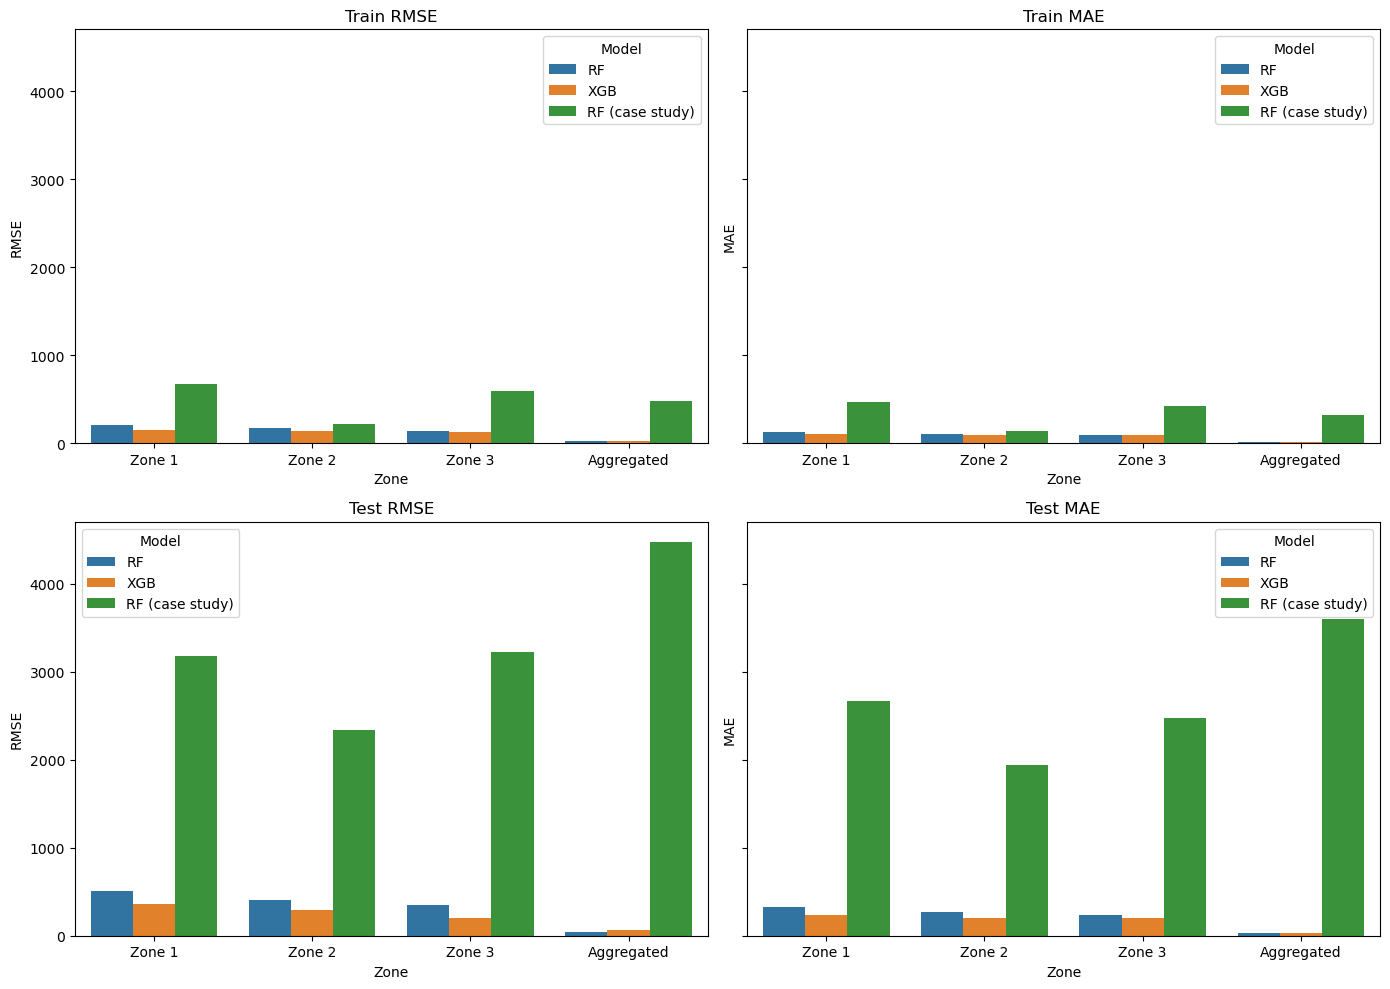

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the data
data_vi = {
    'Zone': ['Zone 1', 'Zone 1', 'Zone 2', 'Zone 2', 'Zone 3', 'Zone 3', 'Aggregated', 'Aggregated',
             'Zone 1', 'Zone 1', 'Zone 2', 'Zone 2', 'Zone 3', 'Zone 3', 'Aggregated', 'Aggregated',
            'Zone 1', 'Zone 1', 'Zone 2', 'Zone 2', 'Zone 3', 'Zone 3', 'Aggregated', 'Aggregated',
             'Zone 1', 'Zone 1', 'Zone 2', 'Zone 2', 'Zone 3', 'Zone 3', 'Aggregated', 'Aggregated',
             'Zone 1', 'Zone 1', 'Zone 2', 'Zone 2', 'Zone 3', 'Zone 3', 'Aggregated', 'Aggregated',
             'Zone 1', 'Zone 1', 'Zone 2', 'Zone 2', 'Zone 3', 'Zone 3', 'Aggregated', 'Aggregated'],
    'Metric': ['RMSE', 'MAE', 'RMSE', 'MAE', 'RMSE', 'MAE', 'RMSE', 'MAE',
               'RMSE', 'MAE', 'RMSE', 'MAE', 'RMSE', 'MAE', 'RMSE', 'MAE',
              'RMSE', 'MAE', 'RMSE', 'MAE', 'RMSE', 'MAE', 'RMSE', 'MAE',
               'RMSE', 'MAE', 'RMSE', 'MAE', 'RMSE', 'MAE', 'RMSE', 'MAE',
              'RMSE', 'MAE', 'RMSE', 'MAE', 'RMSE', 'MAE', 'RMSE', 'MAE',
               'RMSE', 'MAE', 'RMSE', 'MAE', 'RMSE', 'MAE', 'RMSE', 'MAE'],
    'Data': ['Train', 'Train', 'Train', 'Train', 'Train', 'Train', 'Train', 'Train',
             'Test', 'Test', 'Test', 'Test', 'Test', 'Test', 'Test', 'Test',
            'Train', 'Train', 'Train', 'Train', 'Train', 'Train', 'Train', 'Train',
             'Test', 'Test', 'Test', 'Test', 'Test', 'Test', 'Test', 'Test',
            'Train', 'Train', 'Train', 'Train', 'Train', 'Train', 'Train', 'Train',
             'Test', 'Test', 'Test', 'Test', 'Test', 'Test', 'Test', 'Test'],
    'Model': ['RF', 'RF', 'RF', 'RF', 'RF', 'RF', 'RF', 'RF','RF', 'RF', 'RF', 'RF', 'RF', 'RF', 'RF', 'RF',
              'XGB', 'XGB', 'XGB', 'XGB', 'XGB', 'XGB', 'XGB', 'XGB','XGB', 'XGB', 'XGB', 'XGB', 'XGB', 'XGB', 'XGB', 'XGB',
             'RF (case study)', 'RF (case study)', 'RF (case study)', 'RF (case study)', 'RF (case study)', 'RF (case study)', 'RF (case study)', 'RF (case study)',
              'RF (case study)', 'RF (case study)', 'RF (case study)', 'RF (case study)', 'RF (case study)', 'RF (case study)', 'RF (case study)', 'RF (case study)'],
    'Value': [205.3, 129.2, 169.8, 106.9, 143.5, 93.5, 23.2, 13.3,
              508.5, 323.1, 410.7, 267.7, 352.2, 234.3, 43.3, 25.9,
             148.0, 110.0, 135.0, 99.0, 124.0, 91.0, 22.0, 17.0,
              356.0, 236.0, 296.0, 202.0, 203.0, 198.0, 62.0, 29.0,
             671.7,472.8,214.1,135.6,594.5,420.5,482.3,318.5,
             3174.7,2663.5,2336.9,1939.6,3227.8,2475.9,4481.1,3595.3]
}

# Convert the data to a DataFrame
df = pd.DataFrame(data_vi)

# Pivot the data for better table visualization
pivot_train = df[df['Data'] == 'Train'].pivot_table(index=['Zone', 'Metric'], columns='Model', values='Value')
pivot_test = df[df['Data'] == 'Test'].pivot_table(index=['Zone', 'Metric'], columns='Model', values='Value')

# Print the tables
print("Training Data Results")
print(pivot_train)
print("\nTest Data Results")
print(pivot_test)

# Plotting the results
fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharey=True)

# Train RMSE
sns.barplot(x='Zone', y='Value', hue='Model', data=df[(df['Metric'] == 'RMSE') & (df['Data'] == 'Train')], ax=axes[0, 0])
axes[0, 0].set_title('Train RMSE')
axes[0, 0].set_ylabel('RMSE')

# Train MAE
sns.barplot(x='Zone', y='Value', hue='Model', data=df[(df['Metric'] == 'MAE') & (df['Data'] == 'Train')], ax=axes[0, 1])
axes[0, 1].set_title('Train MAE')
axes[0, 1].set_ylabel('MAE')

# Test RMSE
sns.barplot(x='Zone', y='Value', hue='Model', data=df[(df['Metric'] == 'RMSE') & (df['Data'] == 'Test')], ax=axes[1, 0])
axes[1, 0].set_title('Test RMSE')
axes[1, 0].set_ylabel('RMSE')

# Test MAE
sns.barplot(x='Zone', y='Value', hue='Model', data=df[(df['Metric'] == 'MAE') & (df['Data'] == 'Test')], ax=axes[1, 1])
axes[1, 1].set_title('Test MAE')
axes[1, 1].set_ylabel('MAE')

# Adjust layout
plt.tight_layout()
plt.show()


Hourly analysis comparison - Random forest and XGBoost

Training Data Results
Model                 RF  RF (case study)    XGB
Zone       Metric                               
Aggregated MAE      41.0           3493.7   15.0
           RMSE     66.0           4960.9   20.0
Zone 1     MAE     236.0           2286.7  218.0
           RMSE    339.0           3185.8  325.0
Zone 2     MAE     232.0           2342.3  153.0
           RMSE    359.0           3602.2  211.0
Zone 3     MAE     465.0           4079.2  136.0
           RMSE    667.0           5669.8  186.0

Test Data Results
Model                 RF  RF (case study)    XGB
Zone       Metric                               
Aggregated MAE      96.0          24033.3   30.0
           RMSE    154.0          28769.3   75.0
Zone 1     MAE     565.0          15442.0  178.0
           RMSE    826.0          21109.7  270.0
Zone 2     MAE     508.0          11955.2  368.0
           RMSE    743.0          14700.9  546.0
Zone 3     MAE     571.0          15777.6  330.0
           RMSE    837.0    

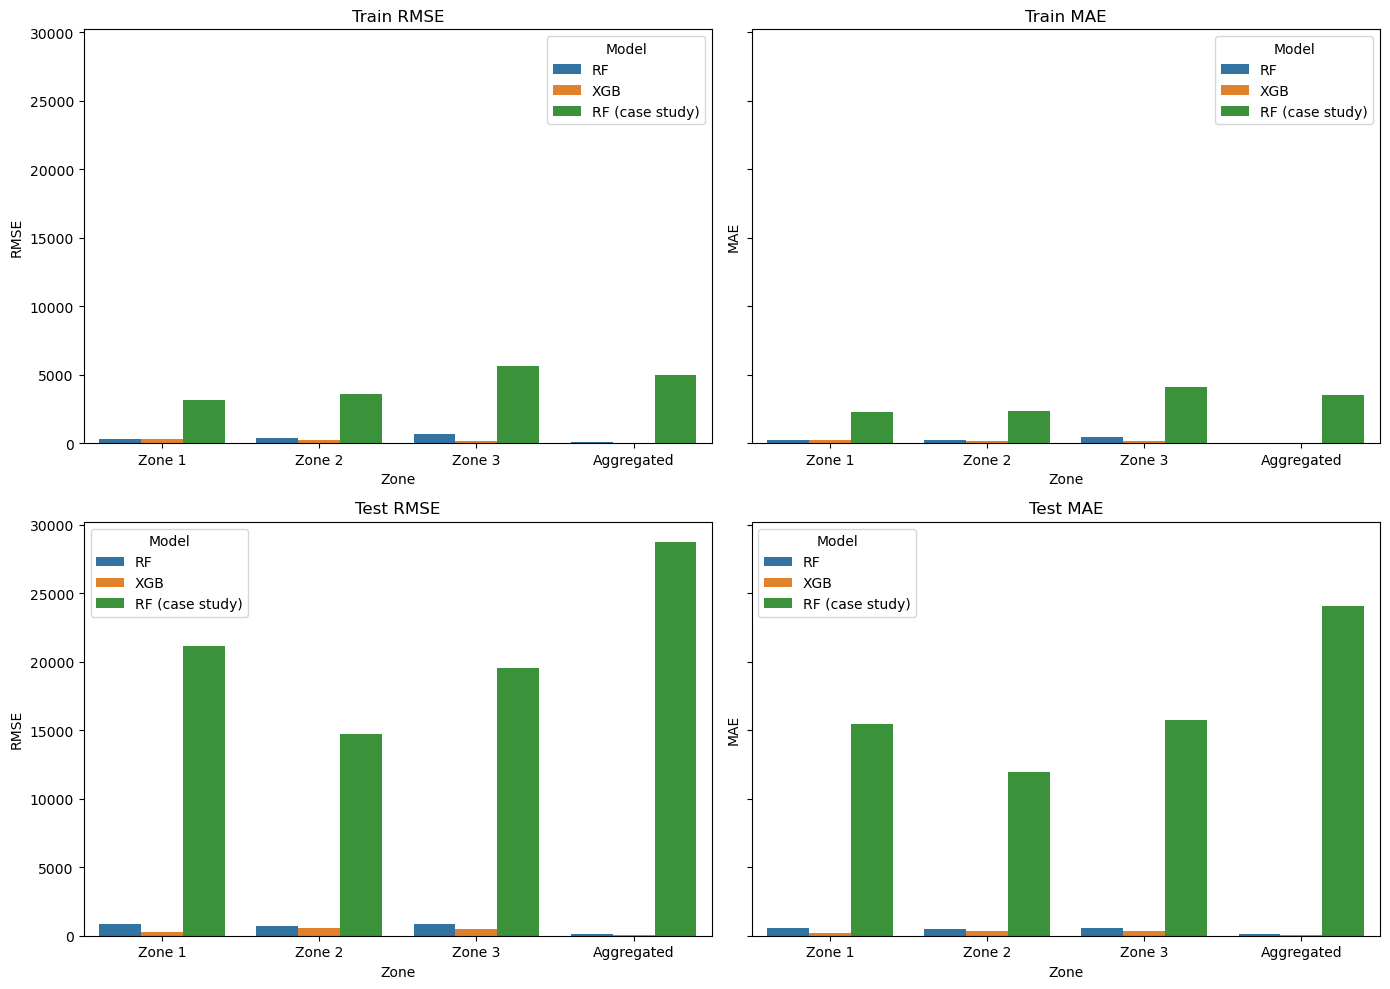

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the data
data_vi_h = {
    'Zone': ['Zone 1', 'Zone 1', 'Zone 2', 'Zone 2', 'Zone 3', 'Zone 3', 'Aggregated', 'Aggregated',
             'Zone 1', 'Zone 1', 'Zone 2', 'Zone 2', 'Zone 3', 'Zone 3', 'Aggregated', 'Aggregated',
            'Zone 1', 'Zone 1', 'Zone 2', 'Zone 2', 'Zone 3', 'Zone 3', 'Aggregated', 'Aggregated',
             'Zone 1', 'Zone 1', 'Zone 2', 'Zone 2', 'Zone 3', 'Zone 3', 'Aggregated', 'Aggregated',
            'Zone 1', 'Zone 1', 'Zone 2', 'Zone 2', 'Zone 3', 'Zone 3', 'Aggregated', 'Aggregated',
             'Zone 1', 'Zone 1', 'Zone 2', 'Zone 2', 'Zone 3', 'Zone 3', 'Aggregated', 'Aggregated'],
    'Metric': ['RMSE', 'MAE', 'RMSE', 'MAE', 'RMSE', 'MAE', 'RMSE', 'MAE',
               'RMSE', 'MAE', 'RMSE', 'MAE', 'RMSE', 'MAE', 'RMSE', 'MAE',
              'RMSE', 'MAE', 'RMSE', 'MAE', 'RMSE', 'MAE', 'RMSE', 'MAE',
               'RMSE', 'MAE', 'RMSE', 'MAE', 'RMSE', 'MAE', 'RMSE', 'MAE',
              'RMSE', 'MAE', 'RMSE', 'MAE', 'RMSE', 'MAE', 'RMSE', 'MAE',
               'RMSE', 'MAE', 'RMSE', 'MAE', 'RMSE', 'MAE', 'RMSE', 'MAE'],
    'Data': ['Train', 'Train', 'Train', 'Train', 'Train', 'Train', 'Train', 'Train',
             'Test', 'Test', 'Test', 'Test', 'Test', 'Test', 'Test', 'Test',
            'Train', 'Train', 'Train', 'Train', 'Train', 'Train', 'Train', 'Train',
             'Test', 'Test', 'Test', 'Test', 'Test', 'Test', 'Test', 'Test',
            'Train', 'Train', 'Train', 'Train', 'Train', 'Train', 'Train', 'Train',
             'Test', 'Test', 'Test', 'Test', 'Test', 'Test', 'Test', 'Test'],
    'Model': ['RF', 'RF', 'RF', 'RF', 'RF', 'RF', 'RF', 'RF','RF', 'RF', 'RF', 'RF', 'RF', 'RF', 'RF', 'RF',
              'XGB', 'XGB', 'XGB', 'XGB', 'XGB', 'XGB', 'XGB', 'XGB','XGB', 'XGB', 'XGB', 'XGB', 'XGB', 'XGB', 'XGB', 'XGB',
              'RF (case study)', 'RF (case study)', 'RF (case study)', 'RF (case study)', 'RF (case study)', 'RF (case study)', 'RF (case study)', 'RF (case study)',
              'RF (case study)', 'RF (case study)', 'RF (case study)', 'RF (case study)', 'RF (case study)', 'RF (case study)', 'RF (case study)', 'RF (case study)'],
    'Value': [339.0, 236.0, 359.0, 232.0, 667.0, 465.0, 66.0, 41.0,
              826.0, 565.0, 743.0, 508.0, 837.0, 571.0, 154.0, 96.0,
              325.0, 218.0, 211.0, 153.0, 186.0, 136.0, 20.0, 15.0,
              270.0, 178.0, 546.0, 368.0, 488.0, 330.0, 75.0, 30.0,
             3185.8, 2286.7,3602.2,2342.3,5669.8,4079.2,4960.9,3493.7,
             21109.7,15442,14700.9,11955.2,19504.1,15777.6,28769.3,24033.3]
}

# Convert the data to a DataFrame
df = pd.DataFrame(data_vi_h)

# Pivot the data for better table visualization
pivot_train = df[df['Data'] == 'Train'].pivot_table(index=['Zone', 'Metric'], columns='Model', values='Value')
pivot_test = df[df['Data'] == 'Test'].pivot_table(index=['Zone', 'Metric'], columns='Model', values='Value')

# Print the tables
print("Training Data Results")
print(pivot_train)
print("\nTest Data Results")
print(pivot_test)

# Plotting the results
fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharey=True)

# Train RMSE
sns.barplot(x='Zone', y='Value', hue='Model', data=df[(df['Metric'] == 'RMSE') & (df['Data'] == 'Train')], ax=axes[0, 0])
axes[0, 0].set_title('Train RMSE')
axes[0, 0].set_ylabel('RMSE')

# Train MAE
sns.barplot(x='Zone', y='Value', hue='Model', data=df[(df['Metric'] == 'MAE') & (df['Data'] == 'Train')], ax=axes[0, 1])
axes[0, 1].set_title('Train MAE')
axes[0, 1].set_ylabel('MAE')

# Test RMSE
sns.barplot(x='Zone', y='Value', hue='Model', data=df[(df['Metric'] == 'RMSE') & (df['Data'] == 'Test')], ax=axes[1, 0])
axes[1, 0].set_title('Test RMSE')
axes[1, 0].set_ylabel('RMSE')

# Test MAE
sns.barplot(x='Zone', y='Value', hue='Model', data=df[(df['Metric'] == 'MAE') & (df['Data'] == 'Test')], ax=axes[1, 1])
axes[1, 1].set_title('Test MAE')
axes[1, 1].set_ylabel('MAE')

# Adjust layout
plt.tight_layout()
plt.show()


**Compare and discuss results with respect to existing literatures.**

According to An Empirical Comparison of Supervised Learning Algorithms, boosted trees learning method has been producing excellent performance on all metrics [1]. The paper also has stated that calibration significantly improves the performance of this learning method, together with other methods such as support vector machine. The authors suggest that random forest algorithm has the second highest performance. This conclusion is similar to what has been achieved in this task, in which random forest model is able to outperform other suggested models in the first part, and the boosted tree model in the second part gives even better evaluation metrics.

Author Sarswatula provides applications of predictive models for energy consumption at the metal, electrical, food and plastic manufacturing industries. The study uses variables such as Annual production quantities, annual sales, number of employees and annual operating hours [2]. The results suggest that random forest regressor is the best technique which produces the lowest R2 value. This result is rather expected as the study as the experiment is not as complex as the Tetouan City study. Between Random forest and XGBoost algorithms, XGBoost often excels at capturing complex patterns and interactions in the data with high-dimensional feature sets.

“Electricity consumption prediction using machine learning” created a machine learning-based predictive method using information of a year’s worth of hourly energy use [3]. Four types of models, including support vector machine, k-nearest neighbour, XGBoost regressor, random forest, and artificial neural networks were developed and performances were observed based on MAE, RMSE and R2 values. K-nearest neighbour was determined to have provided the best performance, followed by random forest and XGBoost regressor.

A review of energy consumption taking consideration of features such as environmental and temporal factors employed three machine learning models: random forest, XGBoost and linear regression [4]. The author Abumohsen found the random forest model to obtain the lowest MAE and MSE among the chosen three models. 

Linear regression model showed a poor performance in predicting the electricity demand of Turkey  between the years 2018 and 2021 according to [5]. The model was trained in the same study with Random forest and XGBoost techniques. The author concluded that both random forest and XGBoost provided much high efficiency. XGBoost was determined to have the highest prediction performance as it had the lowest RMSE value.

In a different review in Qingdao, China, subway energy consumption was employed with 14 variables including speed, braking force, train weight, passenger flow [6]. XGBoost algorithm provided predictions of energy consumption that were closer to the experimental data compared to SVR and Long short-term memory models.
 
It is generally understood that XGBoost requires more computational time and slower to train than Random forest model. However, when properly tuned, XGBoost model can provide superior performance and flexibility. Various studies on predicting energy consumption across different aspects have proven Random forest and XGBoost models’ ability to handle complex datasets and effectiveness in predicting power usage. These conclusions align with the Tetuoan City case study and this task. Suggestions are made to expand the scope of algorithm selection in order to explore better models for energy consumption predictions. It may be worth considering the K-nearest neighbour model, as well as using more hyperparameters in tuning steps. 


### References

[1] R. Caruana and A. Niculescu-Mizil. (2006) ‘An empirical comparison of supervised learning algorithms’, Proceedings of the 23rd international conference on Machine learning  - ICML ’06 [Preprint]. doi:10.1145/1143844.1143865. 

[2] S.A. Sarswatula,  T. Pugh and V. Prabhu. (2022) ‘Modeling energy consumption using machine learning’, Frontiers in Manufacturing Technology, 2. doi:10.3389/fmtec.2022.855208. 

[3] G. Vijendar Reddy, et al. (2023) “Electricity consumption prediction using machine learning’, E3S Web of Conferences 391, 01048. doi:10.1051/e3sconf/202339101048.

[4] M. Abumohsen, et al. (2023) ‘Electrical Load Forecasting Based on Random Forest, XGBoost, and Linear Regression Algorithms’, 2023 International Conference on Information Technology (ICIT). doi: 10.1109/ICIT58056.2023.10225968.

[5] M. Gokce, E. Duman (2022) ‘Performance Comparison of Simple Regression, Random Forest and XGBoost Algorithms for Forecasting Electricity Demand’,  2022 3rd International Informatics and Software Engineering Conference. doi: 10.1109/IISEC56263.2022.9998213.

[6] J. Ha and Z. Zhou (2023) ‘Subway Energy Consumption Prediction based on XGBoost
Model’, Highlights in Science, Engineering and Technology ICMEA 2023, 70.
